# Table of Contents

1. [To Do](#to-do)
2. [fMRIprep](#fmriprep)
3. [Nibetaseries](#nibetaseries)
4. Age Group Differences
4. 1. [Mean FC during cue condition](#age-group-dif-mean-fc)
4. 2. [Network based statistic](#network-based-statistic)
5. [Brain Connectivity Graph Metrics](#bct-graph-metrics)
8. [Statistical analysis](#stats)

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib  # load the beta maps in python
from nilearn import plotting  # plot nifti images
from bct import nbs
from scipy.io import savemat
from mne.viz import plot_connectivity_circle


In [2]:
data_dir = '/Volumes/psybrain/ADM/derivatives'
nibs_dir='/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries'

tasks = ['MemMatch1', 'MemMatch2', 'MemMatch3']
trial_types = ['cue', 'match', 'mismatch']

atlas_file='/Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz'
atlas_lut='/Volumes/psybrain/ADM/derivatives/nibs/power264_labels.tsv'

In [3]:
subjects = np.loadtxt(data_dir + '/nibs/subjects.txt', dtype=str)
subjects

array(['30004', '30008', '30009', '30015', '30019', '30020', '30023',
       '30040', '30057', '30064', '30066', '30069', '30074', '30085',
       '30088', '30090', '30091', '30095', '30096', '30105', '30116',
       '30118', '30119', '30128', '30181', '30217', '30227', '30236',
       '30242', '30255', '30274', '30283', '30295', '30330', '30346',
       '30376', '30395', '30400', '30403', '30412', '30426', '30432',
       '30466', '30469', '30476', '30478', '30568', '30570', '30581',
       '30584', '30588', '40160', '40170', '40175', '40288', '40351',
       '40490', '40512', '40519', '40520', '40524', '40547', '40564',
       '40615', '40619', '40624', '40638', '40649', '40650', '40656',
       '40658', '40664', '40665', '40668', '40672', '40685', '40694',
       '40720', '40738', '40743', '40750', '40773', '40778', '40796',
       '40803', '40855', '40861', '40930', '40961', '40968'], dtype='<U5')

## To Do <a id='to-do'></a>

1. Finish running fmriprep. Repeat for MemMatch 2, 3

9/30: Participants currently running on TACC: \
40961 40968 30255 40861 40855 40782 40496 30417 30090

10/2: Participants complete: 
40961(y) 40968(y) 30255(y) 40861(y) 40855(y) 40782(y) 40496(y) 30417(y) 30090(y)

still need fmriprep on
**30417** - no MemMatch (drop) \
**40782** - run 1: 	 nibs crashfile: /Volumes/psybrain/ADM/derivatives/nibs/sub-40782/log/crash-20211010-115537-PSYC-mcm5324-betaseries_node.a0-de5d651f-0cca-4483-9b22-4fe6ed206768.txt, only has 8 trials for some reason, not 12
**40930** \

3. Run nibetaseries

Confound selection: \
https://neurostars.org/t/confounds-from-fmriprep-which-one-would-you-use-for-glm/326 \
https://code.stanford.edu/rblair2/fmriprep-test/-/blob/master/docs/outputs.rst \


**Participants missing BIDS**
40496 - MemMatch1 \
30433? \
30407 - anat only \
40876

# fMRIprep <a id='fmriprep'></a>

```

Results included in this manuscript come from preprocessing
performed using *fMRIPrep* 1.3.2
(@fmriprep1; @fmriprep2; RRID:SCR_016216),
which is based on *Nipype* 1.1.9
(@nipype1; @nipype2; RRID:SCR_002502).

Anatomical data preprocessing

: The T1-weighted (T1w) image was corrected for intensity non-uniformity (INU)
with `N4BiasFieldCorrection` [@n4], distributed with ANTs 2.2.0 [@ants, RRID:SCR_004757], and used as T1w-reference throughout the workflow.
The T1w-reference was then skull-stripped with a *Nipype* implementation of
the `antsBrainExtraction.sh` workflow (from ANTs), using OASIS30ANTs
as target template.
Spatial normalization to the
*ICBM 152 Nonlinear Asymmetrical template version 2009c* [@mni152nlin2009casym, RRID:SCR_008796]
was performed through nonlinear registration with `antsRegistration`
(ANTs 2.2.0), using brain-extracted versions of both T1w volume
and template.
Brain tissue segmentation of cerebrospinal fluid (CSF),
white-matter (WM) and gray-matter (GM) was performed on
the brain-extracted T1w using `fast` [FSL 5.0.9, RRID:SCR_002823,
@fsl_fast].


Functional data preprocessing

: For each of the 1 BOLD runs found per subject (across all
tasks and sessions), the following preprocessing was performed.
First, a reference volume and its skull-stripped version were generated
using a custom methodology of *fMRIPrep*.
The BOLD reference was then co-registered to the T1w reference using
`flirt` [FSL 5.0.9, @flirt] with the boundary-based registration [@bbr]
cost-function.
Co-registration was configured with nine degrees of freedom to account
for distortions remaining in the BOLD reference.
Head-motion parameters with respect to the BOLD reference
(transformation matrices, and six corresponding rotation and translation
parameters) are estimated before any spatiotemporal filtering using
`mcflirt` [FSL 5.0.9, @mcflirt].
The BOLD time-series (including slice-timing correction when applied)
were resampled onto their original, native space by applying
a single, composite transform to correct for head-motion and
susceptibility distortions.
These resampled BOLD time-series will be referred to as *preprocessed
BOLD in original space*, or just *preprocessed BOLD*.
The BOLD time-series were resampled to MNI152NLin2009cAsym standard space,
generating a *preprocessed BOLD run in MNI152NLin2009cAsym space*.
First, a reference volume and its skull-stripped version were generated
using a custom methodology of *fMRIPrep*.
Several confounding time-series were calculated based on the
*preprocessed BOLD*: framewise displacement (FD), DVARS and
three region-wise global signals.
FD and DVARS are calculated for each functional run, both using their
implementations in *Nipype* [following the definitions by @power_fd_dvars].
The three global signals are extracted within the CSF, the WM, and
the whole-brain masks.
Additionally, a set of physiological regressors were extracted to
allow for component-based noise correction [*CompCor*, @compcor].
Principal components are estimated after high-pass filtering the
*preprocessed BOLD* time-series (using a discrete cosine filter with
128s cut-off) for the two *CompCor* variants: temporal (tCompCor)
and anatomical (aCompCor).
Six tCompCor components are then calculated from the top 5% variable
voxels within a mask covering the subcortical regions.
This subcortical mask is obtained by heavily eroding the brain mask,
which ensures it does not include cortical GM regions.
For aCompCor, six components are calculated within the intersection of
the aforementioned mask and the union of CSF and WM masks calculated
in T1w space, after their projection to the native space of each
functional run (using the inverse BOLD-to-T1w transformation).
The head-motion estimates calculated in the correction step were also
placed within the corresponding confounds file.
All resamplings can be performed with *a single interpolation
step* by composing all the pertinent transformations (i.e. head-motion
transform matrices, susceptibility distortion correction when available,
and co-registrations to anatomical and template spaces).
Gridded (volumetric) resamplings were performed using `antsApplyTransforms` (ANTs),
configured with Lanczos interpolation to minimize the smoothing
effects of other kernels [@lanczos].
Non-gridded (surface) resamplings were performed using `mri_vol2surf`
(FreeSurfer).


Many internal operations of *fMRIPrep* use
*Nilearn* 0.5.0 [@nilearn, RRID:SCR_001362],
mostly within the functional processing workflow.
For more details of the pipeline, see [the section corresponding
to workflows in *fMRIPrep*'s documentation](https://fmriprep.readthedocs.io/en/latest/workflows.html "FMRIPrep's documentation").

```

In [81]:
confounds.drop(['bad_tr', 'ones', 'zeros'], axis=1)

csf  white_matter  global_signal  std_dvars      dvars  \
0    8132.941465   8430.043355   10624.859048        NaN        NaN   
1    8118.993240   8423.914560   10577.636159   1.051489  40.897327   
2    8020.358740   8430.049396   10571.339513   1.084961  42.199207   
3    8058.544199   8430.659345   10576.353999   1.071283  41.667221   
4    8099.276890   8420.325988   10595.796510   1.098948  42.743244   
5    8079.179951   8425.925489   10594.284375   1.061801  41.298401   
6    8121.391640   8435.339866   10615.311500   1.063446  41.362389   
7    8118.548607   8434.347107   10607.950571   1.088768  42.347290   
8    8107.806210   8424.609646   10596.410278   1.052938  40.953690   
9    8082.584959   8431.336269   10602.852501   1.067278  41.511429   
10   8103.829867   8431.113261   10587.129487   1.059176  41.196320   
11   8058.506471   8417.838338   10588.905640   1.093350  42.525509   
12   8113.984231   8433.766323   10594.286007   1.066704  41.489105   
13   8080.951893   8413.768677   10579.641167   1.070437  41.634300   
14   8076.061146   8427.415164   10564.312933   1.138837  44.294716   
15   8069.577990   8413.792570   10559.627560   1.116994  43.445133   
16   8075.143920   8429.089853   10569.738166   1.078418  41.944725   
17   8094.613933   8413.106286   10586.758650   1.100817  42.815929   
18   8098.757799   8427.553612   10592.247668   1.100753  42.813446   
19   8112.765489   8420.195349   10579.050551   1.054249  41.004665   
20   8084.456686   8433.936694   10593.033057   1.042242  40.537666   
21   8094.736316   8424.743661   10552.323382   1.034351  40.230740   
22   8077.332129   8421.834843   10531.800491   1.060232  41.237373   
23   7994.663986   8407.156843   10530.699208   1.271982  49.473328   
24   8037.599843   8423.034049   10593.015258   1.261966  49.083775   
25   8103.746458   8428.043351   10621.968954   1.099610  42.768959   
26   8060.148820   8432.108210   10597.509722   1.098487  42.725281   
27   8136.172218   8431.760171   10561.468073   1.140124  44.344738   
28   8002.058185   8420.248552   10528.984072   1.116386  43.421474   
29   8069.326959   8420.063311   10531.734372   1.095327  42.602406   
..           ...           ...            ...        ...        ...   
134  8115.066663   8412.860887   10560.560521   1.079250  41.977058   
135  8107.692374   8411.095485   10523.046817   1.037844  40.366611   
136  8068.122217   8404.016027   10513.984612   1.075379  41.826511   
137  8044.494887   8401.214009   10513.588835   1.075150  41.817612   
138  8052.517984   8391.137157   10513.534784   1.023165  39.795670   
139  8033.437147   8408.964304   10544.805105   1.053329  40.968887   
140  8072.512931   8400.764338   10545.594788   1.010942  39.320267   
141  8055.766324   8412.057963   10561.919915   1.034633  40.241722   
142  8082.862954   8408.503193   10568.179294   1.050449  40.856888   
143  8093.858668   8414.717906   10586.523941   1.062978  41.344173   
144  8089.542569   8430.316577   10589.808358   1.065315  41.435062   
145  8129.381465   8419.084274   10580.028326   1.088907  42.352684   
146  8088.459795   8426.870254   10552.181779   1.025232  39.876076   
147  8135.230624   8404.161694   10534.318869   1.069581  41.600994   
148  8050.611158   8406.772106   10550.740730   1.059959  41.226768   
149  8097.486652   8400.338155   10554.549877   1.056190  41.080170   
150  8081.724029   8396.845122   10557.936878   1.044386  40.621056   
151  8070.833321   8400.679746   10544.419490   1.038133  40.377861   
152  8094.001155   8408.853342   10549.703202   1.078290  41.939758   
153  8030.545587   8403.920553   10547.580381   1.029554  40.044155   
154  8110.654797   8411.767392   10580.166700   1.090636  42.419949   
155  8088.050539   8411.414376   10594.388800   1.065602  41.446255   
156  8115.047436   8408.263409   10596.720111   1.077310  41.901623   
157  8080.885431   8419.193054   10597.967542   1.071726  41.684437   
158  8125.846671   8412.753722   1058

In [86]:
for subject in subjects:
    for task in tasks:
        confounds_file = data_dir + '/fmriprep/sub-%s/func/sub-%s_task-%s_run-01_desc-confounds_regressors.tsv' % (subject, subject, task)
        print(confounds_file)
        
        confounds = pd.read_csv(confounds_file, sep = '\t')
        for colname in ['bad_tr', 'ones', 'zeros', 'motion_outlier_01']:
            if colname in confounds.columns:
                confounds.drop(colname, axis=1, inplace=True)
        if not os.path.exists(confounds_file.split('.tsv')[0] + '_original.tsv'):
            confounds.to_csv(confounds_file.split('.tsv')[0] + '_original.tsv', index=False, sep = '\t')

        confounds['motion_outlier_00'] = np.where(confounds['framewise_displacement'] >= 0.5, 1, 0)
#         confounds['motion_outlier_01'] = np.ones(len(confounds['framewise_displacement']), dtype=int)
        confounds.to_csv(confounds_file, index=False, sep = '\t')
        
        print(confounds.loc[confounds['motion_outlier_00'] > 0.5])

/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch1_run-01_desc-confounds_regressors.tsv
Empty DataFrame
Columns: [csf, white_matter, global_signal, std_dvars, dvars, framewise_displacement, t_comp_cor_00, t_comp_cor_01, t_comp_cor_02, t_comp_cor_03, t_comp_cor_04, t_comp_cor_05, a_comp_cor_00, a_comp_cor_01, a_comp_cor_02, a_comp_cor_03, a_comp_cor_04, a_comp_cor_05, cosine00, cosine01, trans_x, trans_y, trans_z, rot_x, rot_y, rot_z, motion_outlier_00]
Index: []

[0 rows x 27 columns]
/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch2_run-01_desc-confounds_regressors.tsv
Empty DataFrame
Columns: [csf, white_matter, global_signal, std_dvars, dvars, framewise_displacement, t_comp_cor_00, t_comp_cor_01, t_comp_cor_02, t_comp_cor_03, t_comp_cor_04, t_comp_cor_05, a_comp_cor_00, a_comp_cor_01, a_comp_cor_02, a_comp_cor_03, a_comp_cor_04, a_comp_cor_05, cosine00, cosine01, trans_x, trans_y, trans_z, rot_x, rot_y, rot_z, motion_o

             csf  white_matter  global_signal  std_dvars      dvars  \
151  9309.040493   9414.873822   11563.065278   2.294903  76.031601   

     framewise_displacement  t_comp_cor_00  t_comp_cor_01  t_comp_cor_02  \
151                0.590594      -0.150681       0.041915       0.253494   

     t_comp_cor_03  ...  a_comp_cor_05  cosine00  cosine01   trans_x  \
151       -0.01566  ...       0.273049 -0.107281  0.098008  0.037498   

      trans_y   trans_z     rot_x    rot_y     rot_z  motion_outlier_00  
151  0.020681 -0.022646  0.002896  0.00066  0.000789                  1  

[1 rows x 27 columns]
/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30019/func/sub-30019_task-MemMatch2_run-01_desc-confounds_regressors.tsv
Empty DataFrame
Columns: [csf, white_matter, global_signal, std_dvars, dvars, framewise_displacement, t_comp_cor_00, t_comp_cor_01, t_comp_cor_02, t_comp_cor_03, t_comp_cor_04, t_comp_cor_05, a_comp_cor_00, a_comp_cor_01, a_comp_cor_02, a_comp_cor_03, a_comp_cor_04, a

            csf  white_matter  global_signal  std_dvars      dvars  \
39  8686.385944   8259.646435   10116.156509   1.418134  54.471008   

    framewise_displacement  t_comp_cor_00  t_comp_cor_01  t_comp_cor_02  \
39                0.519839      -0.275641       0.035986      -0.040262   

    t_comp_cor_03  ...  a_comp_cor_05  cosine00  cosine01   trans_x   trans_y  \
39      -0.226287  ...       -0.07199  0.080298  0.006343 -0.135214 -0.082038   

     trans_z     rot_x     rot_y     rot_z  motion_outlier_00  
39 -0.206174 -0.005228 -0.001224 -0.001222                  1  

[1 rows x 27 columns]
/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30069/func/sub-30069_task-MemMatch1_run-01_desc-confounds_regressors.tsv
Empty DataFrame
Columns: [csf, white_matter, global_signal, std_dvars, dvars, framewise_displacement, t_comp_cor_00, t_comp_cor_01, t_comp_cor_02, t_comp_cor_03, t_comp_cor_04, t_comp_cor_05, a_comp_cor_00, a_comp_cor_01, a_comp_cor_02, a_comp_cor_03, a_comp_cor_04, a_comp_

FileNotFoundError: [Errno 2] File b'/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30090/func/sub-30090_task-MemMatch2_run-01_desc-confounds_regressors.tsv' does not exist: b'/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30090/func/sub-30090_task-MemMatch2_run-01_desc-confounds_regressors.tsv'

In [ ]:
events_files = glob.glob('/Volumes/psybrain/ADM/sub-40782/func/*events.tsv')
print(events_files)


# Nibetaseries <a id='nibetaseries'></a>

```bash

cd /Volumes/psybrain/ADM/derivatives/nibs/
rm -rf nibetaseries_work/.smb*

for subject in `cat remaining.txt | tail -10`; do
    echo $subject
    printf '\n\n RUN 1'
    nibs --nthreads 1 -n-cpus 1 -c a_comp_cor_00 trans_x trans_y trans_z rot_x rot_y rot_z motion_outlier_00 -t MemMatch1 --participant-label $subject --estimator lss --hrf-model 'spm + derivative' -sm 6 /Volumes/psybrain/ADM /Volumes/psybrain/ADM/derivatives/fmriprep /Volumes/psybrain/ADM/derivatives/nibs participant; sleep 10;
    printf '\n\n RUN 2'
    nibs --nthreads 1 -n-cpus 1 -c a_comp_cor_00 trans_x trans_y trans_z rot_x rot_y rot_z motion_outlier_00 -t MemMatch2 --participant-label $subject --estimator lss --hrf-model 'spm + derivative' -sm 6 /Volumes/psybrain/ADM /Volumes/psybrain/ADM/derivatives/fmriprep /Volumes/psybrain/ADM/derivatives/nibs participant; sleep 10;
    printf '\n\n RUN 3'
    nibs --nthreads 1 -n-cpus 1 -c a_comp_cor_00 trans_x trans_y trans_z rot_x rot_y rot_z motion_outlier_00 -t MemMatch3 --participant-label $subject --estimator lss --hrf-model 'spm + derivative' -sm 6 /Volumes/psybrain/ADM /Volumes/psybrain/ADM/derivatives/fmriprep /Volumes/psybrain/ADM/derivatives/nibs participant; sleep 10;
    echo "completed subjects: " 
    echo `ls nibetaseries/. | wc -l`
done




## Checking which subjects still need nibs

In [8]:
remaining = []

for subject in subjects:
    if 'sub-' + subject not in os.listdir(nibs_dir):
        remaining.append(subject)

print('subjects remaining %.f' % len(remaining))
np.savetxt('/Volumes/psybrain/ADM/derivatives/nibs/subjects_remaining.txt', remaining, fmt = "%s")

subjects remaining 40


In [15]:
subject = '30004'
check_file = nibs_dir + '/%s/func/%s_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz' % (subject, subject)
print(check_file)
glob.glob(check_file)

/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/30004/func/30004_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz


[]

In [45]:
sub_run1 = []
sub_run2 = []
sub_run3 = []

for subject in np.loadtxt('/Volumes/psybrain/ADM/derivatives/nibs/subjects.txt', dtype=str):
    print(subject)
    check_file = nibs_dir + '/sub-%s/func/sub-%s_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz' % (subject, subject)
    print(check_file)
    completed = glob.glob(check_file)
    nrun = len(completed)
    missing = []
    
    if nrun < 3:
        for file in completed:
            print(file)
            print(file.split('MemMatch')[1][:1])
            missing.append(file.split('MemMatch')[1][:1])
            print(missing)
            
        if '1' not in missing:
            print('missing 1')
            sub_run1.append(subject)
            
        if '2' not in missing:
            print('missing 2')
            sub_run2.append(subject)
            
        if '3' not in missing:
            print('missing 3')
            sub_run3.append(subject)
    

30004
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-30004/func/sub-30004_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
30008
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-30008/func/sub-30008_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
30009
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-30009/func/sub-30009_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
30015
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-30015/func/sub-30015_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
30019
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-30019/func/sub-30019_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
30020
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-30020/func/sub-30020_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
30023
/Volumes/psybrain/ADM/deriva

40520
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40520/func/sub-40520_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
40524
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40524/func/sub-40524_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
40547
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40547/func/sub-40547_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
40564
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40564/func/sub-40564_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
40615
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40615/func/sub-40615_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
40619
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40619/func/sub-40619_task-MemMatch[1-3]_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
40624
/Volumes/psybrain/ADM/deriva

In [46]:
print('remaining subjects without MemMatch1 beta images: n =%.f' % len(sub_run1))
print('remaining subjects without MemMatch2 beta images: n =%.f' % len(sub_run2))
print('remaining subjects without MemMatch3 beta images: n =%.f' % len(sub_run3))

remaining subjects without MemMatch1 beta images: n =1
remaining subjects without MemMatch2 beta images: n =1
remaining subjects without MemMatch3 beta images: n =1


In [26]:
np.savetxt('/Volumes/psybrain/ADM/derivatives/nibs/subjects_run1.txt', sub_run1, fmt = "%s")

In [27]:
np.savetxt('/Volumes/psybrain/ADM/derivatives/nibs/subjects_run2.txt', sub_run2, fmt = "%s")

In [28]:
np.savetxt('/Volumes/psybrain/ADM/derivatives/nibs/subjects_run3.txt', sub_run3, fmt = "%s")

In [ ]:
```bash
cd /Volumes/psybrain/ADM/derivatives/nibs/
rm -rf nibetaseries_work/.smb*

# nibs -c a_comp_cor_00 trans_x trans_y trans_z rot_x rot_y rot_z motion_outlier_00 -t MemMatch1 --participant-label `cat subjects_run1.txt | head -8` --estimator lss --hrf-model 'spm + derivative' -sm 6 /Volumes/psybrain/ADM /Volumes/psybrain/ADM/derivatives/fmriprep /Volumes/psybrain/ADM/derivatives/nibs participant
nibs -c a_comp_cor_00 trans_x trans_y trans_z rot_x rot_y rot_z motion_outlier_00 -t MemMatch1 --participant-label sub-40930 sub-40930 --estimator lss --hrf-model 'spm + derivative' -sm 6 /Volumes/psybrain/ADM /Volumes/psybrain/ADM/derivatives/fmriprep /Volumes/psybrain/ADM/derivatives/nibs participant


```

## Correlation results

In [2]:
glob.glob('/Volumes/psybrain/ADM/sub-30004/func/*MemMatch1*[0-9]_events.tsv')

['/Volumes/psybrain/ADM/sub-30004/func/sub-30004_task-MemMatch1_run-01_events.tsv']

In [3]:
os.listdir(out_dir + "/nibs/nibetaseries/sub-30004/func")

['sub-30004_task-MemMatch3_run-1_space-MNI152NLin2009cAsym_desc-mismatch_correlation.tsv',
 'sub-30004_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-mismatch_correlation.svg',
 'sub-30004_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz',
 'sub-30004_task-MemMatch2_run-1_space-MNI152NLin2009cAsym_desc-match_correlation.svg',
 'sub-30004_task-MemMatch3_run-1_space-MNI152NLin2009cAsym_desc-match_correlation.tsv',
 'sub-30004_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz',
 'sub-30004_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-cue_correlation.tsv',
 'sub-30004_task-MemMatch3_run-1_space-MNI152NLin2009cAsym_desc-cue_correlation.tsv',
 'sub-30004_task-MemMatch2_run-1_space-MNI152NLin2009cAsym_desc-match_correlation.tsv',
 'sub-30004_task-MemMatch3_run-1_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz',
 'sub-30004_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-mismatch_correlation.tsv',
 'sub-30004_task-Mem

### Edit remaining events files

In [26]:
# pd.read_csv('/Volumes/psybrain/ADM/sub-30008/func/sub-30008_task-MemMatch1_run-01_events.tsv', sep = '\t')
pd.read_csv('/Volumes/psybrain/ADM/sub-40930/func/sub-40930_task-MemMatch1_run-01_events.tsv')

onset\tduration\ttrial_type\tcorrect\tresponse_time
0                             3.0\t6.0\tcue\tY\t12181 
1                            21.0\t6.0\tcue\tY\t11331 
2                            39.0\t6.0\tcue\tY\t11560 
3                            60.0\t6.0\tcue\tY\t11624 
4                            81.0\t6.0\tcue\tY\t13041 
5                           102.0\t6.0\tcue\tN\t11793 
6                           120.0\t6.0\tcue\tY\t11412 
7                           139.5\t6.0\tcue\tN\t11719 
8                           159.0\t6.0\tcue\tN\t11394 
9                           178.5\t6.0\tcue\tY\t12500 
10                          198.0\t6.0\tcue\tY\t11200 
11                          219.0\t6.0\tcue\tY\t11583 
12                      12.0\t3.0\tmismatch\tY\t12181 
13                         30.0\t3.0\tmatch\tY\t11331 
14                         48.0\t3.0\tmatch\tY\t11560 
15                      69.0\t3.0\tmismatch\tY\t11624 
16                      90.0\t3.0\tmismatch\tY\t13041 
17                     111.0\t3.0\tmismatch\tN\t11793 
18                        129.0\t3.0\tmatch\tY\t11412 
19                     148.5\t3.0\tmismatch\tN\t11719 
20                     168.0\t3.0\tmismatch\tN\t11394 
21                        187.5\t3.0\tmatch\tY\t12500 
22                        207.0\t3.0\tmatch\tY\t11200 
23                        228.0\t3.0\tmatch\tY\t11583

In [29]:
events = pd.read_csv('/Volumes/psybrain/ADM/sub-40782/func/sub-40782_task-MemMatch3_run-01_events.tsv', sep = '\t')
eventsnew = events.copy()
eventsnew['trial_type'] = np.where(eventsnew['Trial_type'].str.contains('mismatch'), 'mismatch', 'match')
eventsnew['onset'] = events['onset'] + 10.5
eventsnew['duration'] = 3.0
eventsnew['response_time'] = eventsnew['Resp_time']
eventsnew['correct'] = np.where(events['answer'] == events['Response'], 'Y', 'N')
eventsnew = eventsnew[['onset', 'duration', 'trial_type', 'correct', 'response_time']]
print(eventsnew)

eventscue = events.copy()
eventscue['trial_type'] = 'cue'
eventscue['duration'] = 6.0
eventscue['onset'] = events['onset'] + 1.5
eventscue['correct'] = np.where(events['answer'] == events['Response'], 'Y', 'N')
eventscue['response_time'] = eventscue['Resp_time']
eventscue = eventscue[['onset', 'duration', 'trial_type', 'correct', 'response_time']]
print(eventscue)

eventsn = pd.concat((eventscue, eventsnew))
eventsn.to_csv('/Volumes/psybrain/ADM/sub-40782/func/sub-40782_task-MemMatch3_run-01_events.tsv')


    onset  duration trial_type correct  response_time
0    12.0       3.0   mismatch       Y          12945
1    33.0       3.0      match       Y          11798
2    52.5       3.0      match       Y          12034
3    73.5       3.0   mismatch       Y          12661
4    93.0       3.0      match       Y          11640
5   114.0       3.0   mismatch       Y          11767
6   132.0       3.0   mismatch       Y          12806
7   150.0       3.0   mismatch       Y          11739
8   169.5       3.0      match       Y          11902
9   190.5       3.0      match       Y          11488
10  208.5       3.0   mismatch       Y          12076
11  228.0       3.0      match       Y          12137
    onset  duration trial_type correct  response_time
0     3.0       6.0        cue       Y          12945
1    24.0       6.0        cue       Y          11798
2    43.5       6.0        cue       Y          12034
3    64.5       6.0        cue       Y          12661
4    84.0       6.0        c

### Concatenate runs 1, 2, and 3 of MemMatch task in 4th dimension for each subject

In [47]:
%%bash

out_dir=/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries

for subject in `cat /Volumes/psybrain/ADM/derivatives/nibs/subjects.txt`; do
    echo $subject
    if [ ! -f ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz ]; then
      fslmerge -t ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch2_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch3_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
      fslmerge -t ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch2_run-1_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch3_run-1_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz
      fslmerge -t ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch2_run-1_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch3_run-1_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz
      fi
done


30004
30008
30009
30015
30019
30020
30023
30040
30057
30064
30066
30069
30074
30085
30088
30090
30091
30095
30096
30105
30116
30118
30119
30128
30181
30217
30227
30236
30242
30255
30274
30283
30295
30330
30346
30376
30395
30400
30403
30412
30426
30432
30466
30469
30476
30478
30568
30570
30581
30584
30588
40160
40170
40175
40288
40351
40490
40512
40519
40520
40524
40547
40564
40615
40619
40624
40638
40649
40650
40656
40658
40664
40665
40668
40672
40685
40694
40720
40738
40743
40750
40773
40778
40796
40803
40855
40861
40930
40961
40968


Image Exception : #63 :: No image files match: /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40930/func/sub-40930_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: No image files match: /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40930/func/sub-40930_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries
bash: line 4: 65371 Abort trap: 6           fslmerge -t ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch2_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz ${out_dir}/sub-${subject}/func/sub-${subject}_task-MemMatch3_run-1_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
Image Exception : #63 

In [48]:
%%bash
out_dir=/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries
ls ${out_dir}/sub-*/func/sub-*_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz | wc -l
ls ${out_dir}/sub-3*/func/sub-3*_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz | wc -l
ls ${out_dir}/sub-4*/func/sub-4*_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz | wc -l

      89
      51
      38


In [9]:
subjects = sorted([os.path.basename(x).split('sub-')[1] for x in glob.glob(nibs_dir + '/sub-*')])
print(subjects[-7:])

['40778', '40796', '40803', '40855', '40861', '40961', '40968']


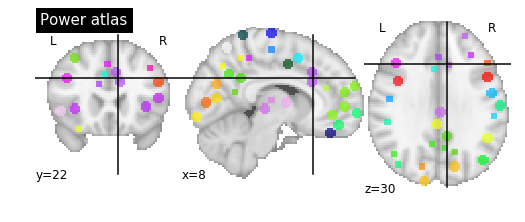

In [11]:
from nilearn import plotting

plotting.plot_roi('/Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz', title="Power atlas")

In [10]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from sklearn.covariance import EmpiricalCovariance
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mne.viz import plot_connectivity_circle
import re


def _fisher_r_to_z(x):
    import numpy as np
    # correct any rounding errors
    # correlations cannot be greater than 1.
    x = np.clip(x, -1, 1)

    return np.arctanh(x)

for subject in subjects[-7:]:
    print(subject)
    out_dir=nibs_dir + '/sub-' + subject + '/func/'
    os.chdir(out_dir)
    
    for trial_type in trial_types:
        # extract timeseries from every label

        if not os.path.exists(os.path.join(out_dir, 'sub-' + subject + '_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-' + trial_type + '_correlation.tsv')):
            
            try: 
                timeseries_file= out_dir + 'sub-' + subject + '_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-' + trial_type + '_betaseries.nii.gz'

                masker = NiftiLabelsMasker(labels_img=atlas_file,
                                           standardize=True, verbose=1)
                timeseries = masker.fit_transform(timeseries_file)
                # create correlation matrix
                correlation_measure = ConnectivityMeasure(cov_estimator=EmpiricalCovariance(),
                                                          kind="correlation")
                correlation_matrix = correlation_measure.fit_transform([timeseries])[0]
                np.fill_diagonal(correlation_matrix, np.NaN)

                # add the atlas labels to the matrix
                atlas_lut_df = pd.read_csv(atlas_lut, sep='\t')
                regions = atlas_lut_df['regions'].values
                correlation_matrix_df = pd.DataFrame(correlation_matrix, index=regions, columns=regions)

                # do a fisher's r -> z transform
                fisher_z_matrix_df = correlation_matrix_df.apply(_fisher_r_to_z)

                # write out the file.

                corr_mat_fname = 'sub-' + subject + '_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-' + trial_type + '_correlation.tsv'
                corr_mat_path = os.path.join(out_dir, corr_mat_fname)
                fisher_z_matrix_df.to_csv(corr_mat_path, sep='\t', na_rep='n/a')

                # visualizations with mne
                connmat = fisher_z_matrix_df.values
                labels = list(fisher_z_matrix_df.index)

                # plot a circle visualization of the correlation matrix
                viz_mat_fname = 'sub-' + subject + '_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-' + trial_type + '_correlation.svg'
                viz_mat_path = os.path.join(out_dir, viz_mat_fname)

                n_lines = int(np.sum(connmat > 0) / 2)
                fig = plt.figure(figsize=(5, 5))

                plot_connectivity_circle(connmat, labels, n_lines=n_lines, fig=fig, title='correlation %s concat' % trial_type,
                                         fontsize_title=10, facecolor='white', textcolor='black',
                                         colormap='jet', colorbar=1, node_colors=['black'],
                                         node_edgecolor=['white'], show=False, interactive=False)

                fig.savefig(viz_mat_path, dpi=300)
                plt.close()

            except Exception as e:
                print(e)



40778
[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40778/func/sub-40778_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40778/func/sub-40778_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40778/func/sub-40778_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


40796
[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40796/func/sub-40796_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40796/func/sub-40796_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40796/func/sub-40796_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


40803
[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40803/func/sub-40803_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/Users/PSYC-mcm5324/Library/Python/3.7/lib/python/site-packages/nilearn/connectome/connectivity_matrices.py:359: RuntimeWarning: divide by zero encountered in true_divide
  diagonal = np.atleast_2d(1. / np.sqrt(np.diag(covariance)))
/Users/PSYC-mcm5324/Library/Python/3.7/lib/python/site-packages/nilearn/connectome/connectivity_matrices.py:360: RuntimeWarning: invalid value encountered in multiply
  correlation = covariance * diagonal * diagonal.T
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.7/site-packages/mne/viz/circle.py:305: RuntimeWarning: invalid value encountered in greater_equal
  con_draw_idx = np.where(con_abs >= con_thresh)[0]


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40803/func/sub-40803_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/Users/PSYC-mcm5324/Library/Python/3.7/lib/python/site-packages/nilearn/connectome/connectivity_matrices.py:359: RuntimeWarning: divide by zero encountered in true_divide
  diagonal = np.atleast_2d(1. / np.sqrt(np.diag(covariance)))
/Users/PSYC-mcm5324/Library/Python/3.7/lib/python/site-packages/nilearn/connectome/connectivity_matrices.py:360: RuntimeWarning: invalid value encountered in multiply
  correlation = covariance * diagonal * diagonal.T
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.7/site-packages/mne/viz/circle.py:305: RuntimeWarning: invalid value encountered in greater_equal
  con_draw_idx = np.where(con_abs >= con_thresh)[0]


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40803/func/sub-40803_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/Users/PSYC-mcm5324/Library/Python/3.7/lib/python/site-packages/nilearn/connectome/connectivity_matrices.py:359: RuntimeWarning: divide by zero encountered in true_divide
  diagonal = np.atleast_2d(1. / np.sqrt(np.diag(covariance)))
/Users/PSYC-mcm5324/Library/Python/3.7/lib/python/site-packages/nilearn/connectome/connectivity_matrices.py:360: RuntimeWarning: invalid value encountered in multiply
  correlation = covariance * diagonal * diagonal.T
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.7/site-packages/mne/viz/circle.py:305: RuntimeWarning: invalid value encountered in greater_equal
  con_draw_idx = np.where(con_abs >= con_thresh)[0]


40855
[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40855/func/sub-40855_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40855/func/sub-40855_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40855/func/sub-40855_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


40861
[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40861/func/sub-40861_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40861/func/sub-40861_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40861/func/sub-40861_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


40961
[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40961/func/sub-40961_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40961/func/sub-40961_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40961/func/sub-40961_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


40968
[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40968/func/sub-40968_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40968/func/sub-40968_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-match_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[NiftiLabelsMasker.fit_transform] loading data from /Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-40968/func/sub-40968_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-mismatch_betaseries.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


[BCT User Guide](https://sites.google.com/site/bctnet/Home/help)

In [181]:
glob.glob(nibs_dir + '/sub-*/func/sub-*_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_correlation.tsv')

['/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries_old/sub-30096/func/sub-30096_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_correlation.tsv',
 '/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries_old/sub-30432/func/sub-30432_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_correlation.tsv',
 '/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries_old/sub-30074/func/sub-30074_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_correlation.tsv',
 '/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries_old/sub-30330/func/sub-30330_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_correlation.tsv',
 '/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries_old/sub-30009/func/sub-30009_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_correlation.tsv',
 '/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries_old/sub-30181/func/sub-30181_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_correlation.tsv',
 '/Volumes/psybrain/ADM/derivative

In [30]:
x = {}

for trial_type in trial_types:
    print('\n' + trial_type)
    corfiles = glob.glob(nibs_dir + '/sub-*/func/sub-*_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-%s_correlation.tsv' % trial_type)
    corfiles_ya = glob.glob(nibs_dir + '/sub-3*/func/sub-3*_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-%s_correlation.tsv' % trial_type)
    corfiles_oa = glob.glob(nibs_dir + '/sub-4*/func/sub-4*_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-%s_correlation.tsv' % trial_type)
    
    x[trial_type] = np.zeros((264,264, len(corfiles)))
    x[trial_type + '_ya'] = np.zeros((264,264, len(corfiles_ya)))
    x[trial_type + '_oa'] = np.zeros((264,264, len(corfiles_oa)))
    i = 0
    j = 0
    k = 0
    
    for file in corfiles:
        subject = file.split('sub-')[1][0:5]
        print(subject)
        print(np.vstack(np.array(pd.read_csv(file, sep='\t', na_values="n/a", index_col=0))).shape)
        x[trial_type][:,:,i] = np.vstack(np.array(pd.read_csv(file, sep='\t', na_values="n/a", index_col=0)))
        np.fill_diagonal(x[trial_type][:,:,i], 0, wrap=False)
        
        if int(subject) < 40000:
            x[trial_type + '_ya'][:,:,j] = np.vstack(np.array(pd.read_csv(file, sep='\t', na_values="n/a", index_col=0)))
            np.fill_diagonal(x[trial_type + '_ya'][:,:,j], 0, wrap=False)
            j+=1
        else:
            x[trial_type + '_oa'][:,:,k] = np.vstack(np.array(pd.read_csv(file, sep='\t', na_values="n/a", index_col=0)))    
            np.fill_diagonal(x[trial_type + '_oa'][:,:,k], 0, wrap=False)
            k+=1
        
        i+=1
        print(i)

np.save('/Volumes/psybrain/ADM/derivatives/nibs/memmatch_fc.npy', x)
savemat('/Volumes/psybrain/ADM/derivatives/nibs/memmatch_fc.mat', x)


cue
40649
(264, 264)
1
30096
(264, 264)
2
30432
(264, 264)
3
40650
(264, 264)
4
40738
(264, 264)
5
30074
(264, 264)
6
30330
(264, 264)
7
30009
(264, 264)
8
40658
(264, 264)
9
30181
(264, 264)
10
40743
(264, 264)
11
40175
(264, 264)
12
40668
(264, 264)
13
40961
(264, 264)
14
30476
(264, 264)
15
30015
(264, 264)
16
30128
(264, 264)
17
30095
(264, 264)
18
30295
(264, 264)
19
30119
(264, 264)
20
30064
(264, 264)
21
30217
(264, 264)
22
40619
(264, 264)
23
40490
(264, 264)
24
30091
(264, 264)
25
30057
(264, 264)
26
40720
(264, 264)
27
40170
(264, 264)
28
40672
(264, 264)
29
30400
(264, 264)
30
40665
(264, 264)
31
40615
(264, 264)
32
40796
(264, 264)
33
30581
(264, 264)
34
30023
(264, 264)
35
40750
(264, 264)
36
40861
(264, 264)
37
40564
(264, 264)
38
30478
(264, 264)
39
30105
(264, 264)
40
30090
(264, 264)
41
30568
(264, 264)
42
40694
(264, 264)
43
30085
(264, 264)
44
30116
(264, 264)
45
40512
(264, 264)
46
30088
(264, 264)
47
40160
(264, 264)
48
30255
(264, 264)
49
40656
(264, 264)
50
3058

In [32]:
atlas = pd.read_csv(atlas_lut, sep='\t').set_index('index')

atlas.regions.unique()

array(['Uncertain', 'Sensory/somatomotor Hand',
       'Sensory/somatomotor Mouth', 'Cingulo-opercular Task Control',
       'Auditory', 'Default mode', 'Memory retrieval?',
       'Ventral attention', 'Visual', 'Fronto-parietal Task Control',
       'Salience', 'Subcortical', 'Cerebellar', 'Dorsal attention'],
      dtype=object)

In [33]:
atlas.columns

Index(['regions'], dtype='object')

In [34]:
atlas = pd.read_csv(atlas_lut, sep='\t').set_index('index')

dmn = atlas.loc[atlas['regions'].str.contains('Default')].index.tolist()
fpn = atlas.loc[atlas['regions'].str.contains('Fronto-parietal')].index.tolist()
dmn_fpn = np.concatenate((dmn, fpn))


In [36]:
atlas.loc[fpn].values.flatten()

array(['Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control', 'Fronto-parietal Task Control',
       'Fronto-parietal Task Control'], dtype=object)

## Age group differences in DMN-FPN FC during cue <a id='age-group-dif-mean-fc'></a>

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/mne/viz/circle.py:305: RuntimeWarning: invalid value encountered in greater_equal
  con_draw_idx = np.where(con_abs >= con_thresh)[0]


(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x1c0fe7310>)

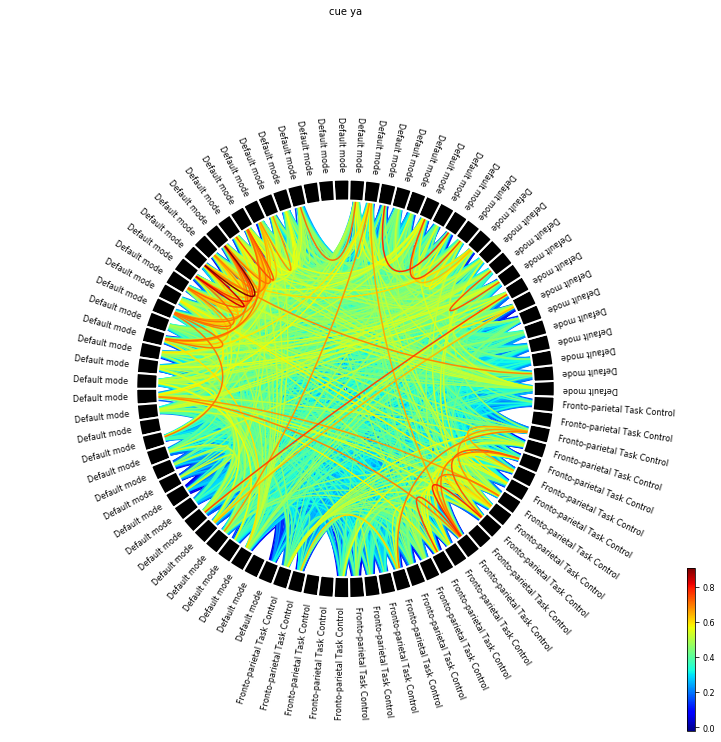

In [37]:
xpy = x['cue_ya'].mean(axis=2)

n_lines = int(np.sum((xpy > 0) / 2))
fig = plt.figure(figsize=(15, 15))
              
plot_connectivity_circle(xpy[dmn_fpn][:,dmn_fpn], atlas.loc[dmn_fpn].values.flatten(), n_lines=n_lines, fig=fig, title='cue ya', 
                         fontsize_title=10, facecolor='white', textcolor='black', 
                         colormap='jet', colorbar=1, node_colors=['black'], 
                         node_edgecolor=['white'], show=False, interactive=False)


(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x1c1bbb650>)

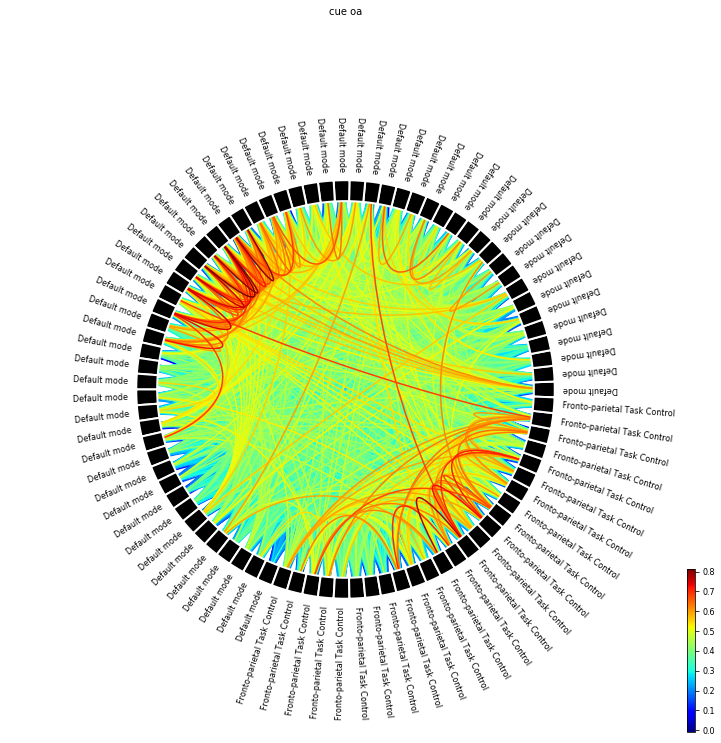

In [38]:
xpo = x['cue_oa'].mean(axis=2)
fig = plt.figure(figsize=(15, 15))

plot_connectivity_circle(xpo[dmn_fpn][:,dmn_fpn], atlas.loc[dmn_fpn].values.flatten(), n_lines=n_lines, fig=fig, title='cue oa', 
                         fontsize_title=10, facecolor='white', textcolor='black', 
                         colormap='jet', colorbar=1, node_colors=['black'], 
                         node_edgecolor=['white'], show=False, interactive=False)

In [39]:
x['cue_ya'].shape

(264, 264, 51)

In [40]:
x['cue_oa'].shape

(264, 264, 37)

In [43]:
x['cue_oa'][:,:,35]

array([[0.        , 0.63977629, 0.01653341, ..., 0.34015785, 0.03554068,
        0.21508494],
       [0.63977629, 0.        , 0.30250593, ..., 0.67654755, 0.31423401,
        0.39361927],
       [0.01653341, 0.30250593, 0.        , ..., 0.35144185, 0.09509778,
        0.32740648],
       ...,
       [0.34015785, 0.67654755, 0.35144185, ..., 0.        , 0.53777688,
        0.36343411],
       [0.03554068, 0.31423401, 0.09509778, ..., 0.53777688, 0.        ,
        0.19420943],
       [0.21508494, 0.39361927, 0.32740648, ..., 0.36343411, 0.19420943,
        0.        ]])

In [44]:
x['cue_ya'][fpn][:,fpn,:].shape

(25, 25, 51)

In [69]:
from nilearn import datasets

power = datasets.fetch_coords_power_2011()
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

print(coords[dmn_fpn])
print(coords[dmn_fpn].shape)

[(  1, -25, -98, -12) (  2,  27, -97, -13) (  3,  24,  32, -18)
 (  4, -56, -45, -24) (  5,   8,  41, -24) (  6, -21, -22, -20)
 (  7,  17, -28, -17) (  8, -37, -29, -26) (  9,  65, -24, -19)
 ( 10,  52, -34, -27) ( 11,  55, -31, -17) ( 12,  34,  38, -12)
 ( 13,  -7, -52,  61) ( 14, -14, -18,  40) ( 15,   0, -15,  47)
 ( 16,  10,  -2,  45) ( 17,  -7, -21,  65) ( 18,  -7, -33,  72)
 ( 19,  13, -33,  75) ( 20, -54, -23,  43) ( 21,  29, -17,  71)
 ( 22,  10, -46,  73) ( 23, -23, -30,  72) ( 24, -40, -19,  54)
 ( 25,  29, -39,  59) ( 26,  50, -20,  42) ( 27, -38, -27,  69)
 ( 28,  20, -29,  60) ( 29,  44,  -8,  57) ( 30, -29, -43,  61)
 ( 31,  10, -17,  74) ( 32,  22, -42,  69) ( 33, -45, -32,  47)
 ( 34, -21, -31,  61) ( 35, -13, -17,  75) ( 36,  42, -20,  55)
 ( 37, -38, -15,  69) ( 38, -16, -46,  73) ( 39,   2, -28,  60)
 ( 40,   3, -17,  58) ( 41,  38, -17,  45) ( 42, -49, -11,  35)
 ( 43,  36,  -9,  14) ( 44,  51,  -6,  32) ( 45, -53, -10,  24)
 ( 46,  66,  -8,  25) ( 47,  -3,   2,  5

# NBS <a id='network-based-statistic'></a>


    '''
    Performs the NBS for populations X and Y for a t-statistic threshold of
    alpha.
    Parameters
    ----------
    x : NxNxP np.ndarray
        matrix representing the first population with P subjects. must be
        symmetric.
    y : NxNxQ np.ndarray
        matrix representing the second population with Q subjects. Q need not
        equal P. must be symmetric.
    thresh : float
        minimum t-value used as threshold
    k : int
        number of permutations used to estimate the empirical null 
        distribution
    tail : {'left', 'right', 'both'}
        enables specification of particular alternative hypothesis
        'left' : mean population of X < mean population of Y
        'right' : mean population of Y < mean population of X
        'both' : means are unequal (default)
    paired : bool
        use paired sample t-test instead of population t-test. requires both
        subject populations to have equal N. default value = False
    verbose : bool
        print some extra information each iteration. defaults value = False
    seed : hashable, optional
        If None (default), use the np.random's global random state to generate random numbers.
        Otherwise, use a new np.random.RandomState instance seeded with the given value.

Ray: t=2.5, 5000 permutations \
'left' : mean population of X < mean population of Y

[design matrix](https://www.nitrc.org/forum/message.php?msg_id=7650)

## Hypothesis: OA will show greater integration between DMN and FPN during cue phase compared to YA

## t=2.5, k=100

In [588]:
nbs_result = nbs.nbs_bct(x['cue_ya'][dmn_fpn][:,dmn_fpn,:], x['cue_oa'][dmn_fpn][:,dmn_fpn,:], 2.5, k=100, tail='left', paired=False, verbose=True)
nbs_result

/usr/local/lib/python3.7/site-packages/bct/nbs.py:163: RuntimeWarning: invalid value encountered in greater
  ind_t, = np.where(t_stat > thresh)


max component size is 101
estimating null distribution with 100 permutations


/usr/local/lib/python3.7/site-packages/bct/nbs.py:219: RuntimeWarning: invalid value encountered in greater
  ind_t, = np.where(t_stat_perm > thresh)


permutation 0 of 100.  Permutation max is 51.0.  Observed max is 101.0.  P-val estimate is 0.000
permutation 1 of 100.  Permutation max is 10.0.  Observed max is 101.0.  P-val estimate is 0.000
permutation 2 of 100.  Permutation max is 32.0.  Observed max is 101.0.  P-val estimate is 0.000
permutation 3 of 100.  Permutation max is 147.0.  Observed max is 101.0.  P-val estimate is 0.250
permutation 4 of 100.  Permutation max is 1.0.  Observed max is 101.0.  P-val estimate is 0.200
permutation 5 of 100.  Permutation max is 2.0.  Observed max is 101.0.  P-val estimate is 0.167
permutation 6 of 100.  Permutation max is 1.0.  Observed max is 101.0.  P-val estimate is 0.143
permutation 7 of 100.  Permutation max is 0.0.  Observed max is 101.0.  P-val estimate is 0.125
permutation 8 of 100.  Permutation max is 48.0.  Observed max is 101.0.  P-val estimate is 0.111
permutation 9 of 100.  Permutation max is 2.0.  Observed max is 101.0.  P-val estimate is 0.100
permutation 10 of 100.  Permutatio

permutation 85 of 100.  Permutation max is 2.0.  Observed max is 101.0.  P-val estimate is 0.047
permutation 86 of 100.  Permutation max is 9.0.  Observed max is 101.0.  P-val estimate is 0.046
permutation 87 of 100.  Permutation max is 53.0.  Observed max is 101.0.  P-val estimate is 0.045
permutation 88 of 100.  Permutation max is 103.0.  Observed max is 101.0.  P-val estimate is 0.056
permutation 89 of 100.  Permutation max is 3.0.  Observed max is 101.0.  P-val estimate is 0.056
permutation 90 of 100.  Permutation max is 9.0.  Observed max is 101.0.  P-val estimate is 0.055
permutation 91 of 100.  Permutation max is 0.0.  Observed max is 101.0.  P-val estimate is 0.054
permutation 92 of 100.  Permutation max is 5.0.  Observed max is 101.0.  P-val estimate is 0.054
permutation 93 of 100.  Permutation max is 10.0.  Observed max is 101.0.  P-val estimate is 0.053
permutation 94 of 100.  Permutation max is 4.0.  Observed max is 101.0.  P-val estimate is 0.053
permutation 95 of 100.  Pe

(array([0.05]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 51.,  10.,  32., 147.,   1.,   2.,   1.,   0.,  48.,   2., 110.,
          7.,   3.,  24.,   1.,   1.,  73.,  12.,   4.,   1.,  18.,   1.,
          1.,   4.,  13.,   1.,   5.,  36.,   1.,   6.,   8.,  10.,   2.,
          1.,  41.,   6.,   1.,   2.,  21.,   1.,   7.,   5., 105., 116.,
          3.,   1.,   9.,  11.,   4.,   1.,   0.,  48.,   2.,  53.,  38.,
          4.,   3.,   2.,   7.,   3.,   1.,  29.,   4.,   7.,   1.,  12.,
          2.,  17.,   7.,  23.,   1.,   1.,   1.,   6.,   1.,   5.,  39.,
          0.,  18.,  52.,   1.,   1.,   4.,  25.,   2.,   2.,   9.,  53.,
        103.,   3.,   9.,   0.,   5.,  10.,   4.,   0.,  15.,   0.,   2.,
         68.]))

(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x1d674b950>)

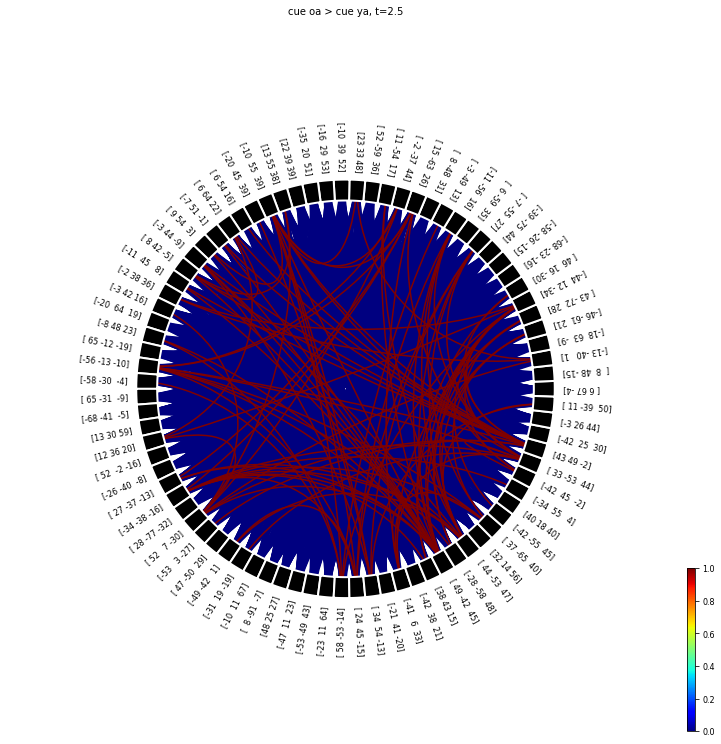

In [589]:
fig = plt.figure(figsize=(15, 15))

plot_connectivity_circle(nbs_result[1], coords[dmn_fpn], n_lines=n_lines, fig=fig, title='cue oa > cue ya, t=2.5', 
                         fontsize_title=10, facecolor='white', textcolor='black', 
                         colormap='jet', colorbar=1, node_colors=['black'], 
                         node_edgecolor=['white'], show=False, interactive=False)

## t=3.5, k=100

In [590]:
nbs_result = nbs.nbs_bct(x['cue_ya'][dmn_fpn][:,dmn_fpn,:], x['cue_oa'][dmn_fpn][:,dmn_fpn,:], 3.5, k=100, tail='left', paired=False, verbose=True)
nbs_result

max component size is 7
estimating null distribution with 100 permutations
permutation 0 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.000
permutation 1 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.000
permutation 2 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.000
permutation 3 of 100.  Permutation max is 1.0.  Observed max is 7.0.  P-val estimate is 0.000
permutation 4 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.000
permutation 5 of 100.  Permutation max is 39.0.  Observed max is 7.0.  P-val estimate is 0.167
permutation 6 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.143
permutation 7 of 100.  Permutation max is 1.0.  Observed max is 7.0.  P-val estimate is 0.125
permutation 8 of 100.  Permutation max is 1.0.  Observed max is 7.0.  P-val estimate is 0.111
permutation 9 of 100.  Permutation max is 1.0.  Observed max is 7.0.  P-val es

permutation 86 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.023
permutation 87 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.023
permutation 88 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.022
permutation 89 of 100.  Permutation max is 3.0.  Observed max is 7.0.  P-val estimate is 0.022
permutation 90 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.022
permutation 91 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.022
permutation 92 of 100.  Permutation max is 1.0.  Observed max is 7.0.  P-val estimate is 0.022
permutation 93 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.021
permutation 94 of 100.  Permutation max is 1.0.  Observed max is 7.0.  P-val estimate is 0.021
permutation 95 of 100.  Permutation max is 0.0.  Observed max is 7.0.  P-val estimate is 0.021
permutation 96 of 100.  Permutation max is 0.0.  O

(array([0.33, 0.1 , 0.33, 0.02]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 0.,  0.,  0.,  1.,  0., 39.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  2.,  8.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  3.,  0.,  0.,  1.,
         1.,  0.,  0.,  5.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  3.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.]))

In [592]:
nbs_result[0] # these are the p-values. Only 4th graph has p < 0.05

array([0.33, 0.1 , 0.33, 0.02])

In [653]:
x['cue_ya'].shape

(264, 264, 51)

In [654]:
x['cue_oa'].shape

(264, 264, 37)

(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x138163950>)

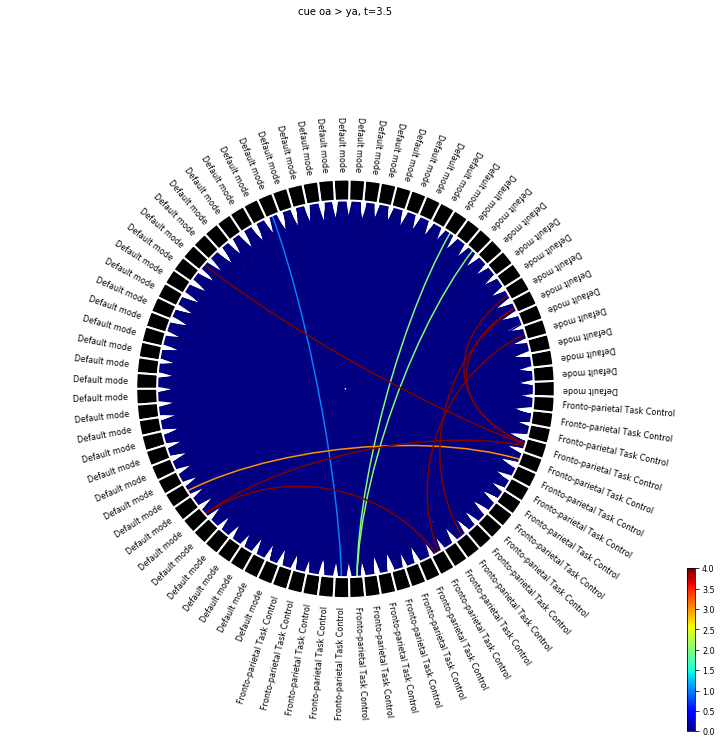

In [599]:
fig = plt.figure(figsize=(15, 15))

plot_connectivity_circle(nbs_result[1], atlas.regions[dmn_fpn].values, n_lines=n_lines, fig=fig, title='cue oa > ya, t=3.5', 
                         fontsize_title=10, facecolor='white', textcolor='black', 
                         colormap='jet', colorbar=1, node_colors=['black'], 
                         node_edgecolor=['white'], show=False, interactive=False)

In [600]:
np.save('/Volumes/psybrain/ADM/derivatives/nibs/results/nbs_cue_oa-gt-ya_t-35_k-5000.npy', nbs_result)
savemat('/Volumes/psybrain/ADM/derivatives/nibs/results/nbs_cue_oa-gt-ya_t-35_k-5000.mat', dict(zip(['pval', 'adj', 'null'], nbs_result)))

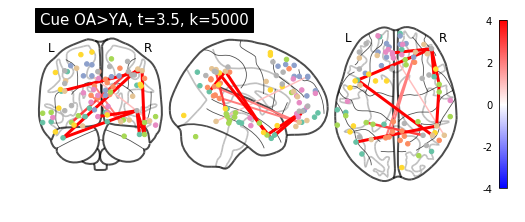

In [601]:
plotting.plot_connectome(nbs_result[1], coords[dmn_fpn], title='Cue OA>YA, t=3.5, k=5000',
                         edge_threshold='90%', node_size=20, colorbar=True, 
                         output_file = '/Volumes/psybrain/ADM/derivatives/nibs/results/nbs_cue_oa-gt-ya_t-35_k-5000.png')

plotting.plot_connectome(nbs_result[1], coords[dmn_fpn], title='Cue OA>YA, t=3.5, k=5000',
                         edge_threshold='90%', node_size=20, colorbar=True)

In [612]:
edges = np.argwhere(nbs_result[1] == 4)
np.vstack(coords[edges])
np.savetxt('/Volumes/psybrain/ADM/derivatives/nibs/results/nbs_cue_oa-gt-ya_t-35_k-5000_edges_coords.txt', np.vstack(coords[edges]), delimiter = ',', fmt='%s')


In [613]:
nbs_community_labels = atlas.regions[dmn_fpn[sorted(edges[:,0])]]
np.where(nbs_community_labels.str.contains('Default'), 1, 2)

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

In [614]:
# x['cue'].shape 
# edges # want 22 x 88 (z at each edge)
nbs_edge_z= x['cue'][edges[:,0]][:, edges[:,1], :]
print(nbs_edge_z.shape)
np.save('/Volumes/psybrain/ADM/derivatives/nibs/results/nbs_cue_oa-gt-ya_t-35_k-5000_z.npy', nbs_edge_z)
savemat('/Volumes/psybrain/ADM/derivatives/nibs/results/nbs_cue_oa-gt-ya_t-35_k-5000_z.mat', dict(zip(['betas'], nbs_edge_z)))

nbs_community_labels = atlas.regions[dmn_fpn[sorted(edges[:,0])]]
nbs_communities = np.where(nbs_community_labels.str.contains('Default'), 1, 2)
np.savetxt('/Volumes/psybrain/ADM/derivatives/nibs/results/nbs_cue_oa-gt-ya_t-35_k-5000_community_labels.txt', nbs_community_labels, fmt='%s')
np.savetxt('/Volumes/psybrain/ADM/derivatives/nibs/results/nbs_cue_oa-gt-ya_t-35_k-5000_communities.txt', nbs_communities, fmt='%s')


(14, 14, 88)


In [228]:
print(edges[0])
print(x['cue'][4,69,0:3])

array([ 4, 69])

In [233]:
print(edges[1])
print(x['cue'][6,71,0:3])

[ 6 71]
[0.02865889 0.03804819 0.20608037]


In [464]:
edges_comp4 = np.argwhere(nbs_result[1] == 4)

np.savetxt('/Volumes/psybrain/ADM/derivatives/nibs/results/edge_comp4_l1.txt', coords[edges_comp4[:,0]], delimiter = ',', fmt='%s')
np.savetxt('/Volumes/psybrain/ADM/derivatives/nibs/results/edge_comp4_l2.txt', coords[edges_comp4[:,1]], delimiter = ',', fmt='%s')


In [465]:
coords[edges_comp4[:,0]]

array([[  8,  41, -24],
       [ 17, -28, -17],
       [ 17, -28, -17],
       [-37, -29, -26],
       [-45, -32,  47],
       [ 37,   1,  -4],
       [ 37,   1,  -4],
       [-55,  -9,  12],
       [-55,  -9,  12],
       [ 59, -17,  29],
       [ 43, -72,  28],
       [ 43, -72,  28],
       [ 43, -72,  28],
       [ 43, -72,  28]])

```
atlasquery [-a "<atlasname>"] [-m <maskimage>] [-c <X>,<Y>,<Z>]

Compulsory arguments (You MUST set one or more of):
        -a,--atlas      name of atlas to use

Optional arguments (You may optionally specify one or more of):
        -V,--verbose    switch on diagnostic messages
        -h,--help       display this message
        -m,--mask       a mask image to use during structural lookups
        -c <X>,<Y>,<Z>  specify coordinates of the point of interest (as mm coordinates)
        --dumpatlases   Dump a list of the available atlases
```

In [151]:
%%bash

atlasquery --dumpatlases

Cerebellar Atlas in MNI152 space after normalization with FLIRT
Cerebellar Atlas in MNI152 space after normalization with FNIRT
Harvard-Oxford Cortical Structural Atlas
Harvard-Oxford Subcortical Structural Atlas
Human Sensorimotor Tracts Labels
JHU ICBM-DTI-81 White-Matter Labels
JHU White-Matter Tractography Atlas
Juelich Histological Atlas
MNI Structural Atlas
Mars Parietal connectivity-based parcellation
Mars TPJ connectivity-based parcellation
Neubert Ventral Frontal connectivity-based parcellation
Oxford Thalamic Connectivity Probability Atlas
Oxford-Imanova Striatal Connectivity Atlas 3 sub-regions
Oxford-Imanova Striatal Connectivity Atlas 7 sub-regions
Oxford-Imanova Striatal Structural Atlas
Sallet Dorsal Frontal connectivity-based parcellation
Subthalamic Nucleus Atlas
Talairach Daemon Labels


In [615]:
%%bash

cd /Volumes/psybrain/ADM/derivatives/nibs/results/
i=1
for coord in `cat edge_comp4_l1.txt`; do
    echo $i
    echo $coord
    atlasquery -a 'Harvard-Oxford Cortical Structural Atlas' -c $coord
    echo `cat edge_comp4_l2.txt | head -$i | tail -1`
    atlasquery -a 'Harvard-Oxford Cortical Structural Atlas' -c `cat edge_comp4_l2.txt | head -$i | tail -1`
    printf '\n\n'
    ((i=i+1))
done

1
8,41,-24
<b>Harvard-Oxford Cortical Structural Atlas</b><br>46% Frontal Medial Cortex, 33% Frontal Pole, 1% Frontal Orbital Cortex
-55,-9,12
<b>Harvard-Oxford Cortical Structural Atlas</b><br>72% Central Opercular Cortex, 5% Planum Polare, 2% Planum Temporale, 1% Postcentral Gyrus


2
17,-28,-17
<b>Harvard-Oxford Cortical Structural Atlas</b><br>59% Parahippocampal Gyrus, posterior division
59,-17,29
<b>Harvard-Oxford Cortical Structural Atlas</b><br>40% Postcentral Gyrus, 23% Supramarginal Gyrus, anterior division, 2% Parietal Operculum Cortex


3
17,-28,-17
<b>Harvard-Oxford Cortical Structural Atlas</b><br>59% Parahippocampal Gyrus, posterior division
43,-72,28
<b>Harvard-Oxford Cortical Structural Atlas</b><br>60% Lateral Occipital Cortex, superior division


4
-37,-29,-26
<b>Harvard-Oxford Cortical Structural Atlas</b><br>84% Temporal Fusiform Cortex, posterior division, 4% Inferior Temporal Gyrus, posterior division, 1% Parahippocampal Gyrus, posterior division
43,-72,28
<b>Har

# BCT graph metrics <a id='bct-graph-metrics'></a>

(83,)

In [475]:
from bct import visualization

visualization.reorderMAT(nbs_edge_z[:,:,0], H=5000, cost='line')

(array([[ 0.        ,  0.12128273,  0.12128273,  0.19842009,  0.05218095,
          0.02865889,  0.12128273,  0.19842009,  0.        , -0.19716169,
         -0.19716169, -0.10733827,  0.16009695,  0.        ],
        [ 0.57895376,  0.        ,  0.57895376,  0.0635338 ,  0.34021789,
          0.04968686,  0.57895376,  0.0635338 ,  0.16009695,  0.17945112,
          0.17945112,  0.05033267,  0.        ,  0.16009695],
        [ 0.16506049,  0.16506049,  0.        ,  0.19811561,  0.37756139,
          0.53139219,  0.16506049,  0.19811561, -0.10733827,  0.20148167,
          0.20148167,  0.        ,  0.05033267, -0.10733827],
        [ 0.21300719,  0.21300719,  0.21300719,  0.        ,  0.35655462,
          0.47565916,  0.21300719,  0.36651432, -0.19716169,  0.        ,
          0.        ,  0.20148167,  0.17945112, -0.19716169],
        [ 0.21300719,  0.21300719,  0.21300719,  0.36651432,  0.        ,
          0.47565916,  0.21300719,  0.36651432, -0.19716169,  0.        ,
          0.

In [559]:
from bct import modularity
from bct import centrality
from bct import other
from bct import visualization

m_colnames = ['subject']
pc_colnames = ['subject']
thresholds = np.arange(10, 22, 2)

wb = np.array(atlas.regions.index)-1
regions = [wb, dmn_fpn]

# thresholds = 'nbs'
# for thr in thresholds: m_colnames.append('mod_%s' % thr)
# for thr in thresholds: pc_colnames.append('pc_%s' % thr)

mod = pd.DataFrame()
pc = pd.DataFrame()
pc_array = {}

# m = nbs_edge_z
m = x['cue'][dmn_fpn][:,dmn_fpn,:]

for region in regions:
    if region = wb:
        m = x['cue']
        d = {ni: indi for indi, ni in enumerate(set(atlas.regions))}
        print(d)
        communities = [d[ni] for ni in atlas.regions]
        
    else:
        m = x['cue'][region][:,region,:]
        d = {ni: indi for indi, ni in enumerate(set(atlas.regions[region]))}
        print(d)
        communities = [d[ni] for ni in atlas.regions[region]]
    
    pc_array[region] = {}
    
    for subject, idx in zip(subjects, range(0, m.shape[2])):
#     print(x['cue'][dmn_fpn][:,dmn_fpn,idx].shape)
        
        for threshold in thresholds:
            g = other.threshold_proportional(m[:,:,idx], p=float(threshold)*.01, copy=True)
    #     g = visualization.reorderMAT(m[:,:,idx], H=5000, cost='line')[0]
            
            mod = mod.append({'subject': subject, 'region': region, 'mod_%s' % threshold : modularity.modularity_und(g, gamma=1, kci=communities)[1]}, ignore_index=True)
            
            pc_array[region][subject] = centrality.participation_coef(g, ci=communities, degree='undirected')
            pc = pc.append({'subject': subject, 'region': region, 'pc_%s' % threshold : centrality.participation_coef(g, ci=communities, degree='undirected').mean()}, ignore_index=True)

    mod = mod.groupby(['subject', 'region']).sum()
    pc = pc.groupby(['subject', 'region']).sum()
    
    print(mod)
    print(pc)

mod.to_csv('/Volumes/psybrain/ADM/derivatives/nibs/results/modularity.csv')
pc.to_csv('/Volumes/psybrain/ADM/derivatives/nibs/results/participation_coefficient.csv')
np.save('/Volumes/psybrain/ADM/derivatives/nibs/results/participation_coefficient_nodewise.npy', pc_array)


In [560]:
mod[0:5]

mod_10    mod_12    mod_14    mod_16    mod_18    mod_20
subject                                                            
30004    0.125659  0.130191  0.119558  0.111548  0.103587  0.102346
30008    0.188766  0.175560  0.163659  0.153286  0.145088  0.139573
30009    0.029908  0.032608  0.034110  0.038122  0.044705  0.044904
30015    0.104143  0.098877  0.092724  0.085591  0.078520  0.082808
30019    0.263958  0.252200  0.244926  0.239032  0.232553  0.219230

In [561]:
pd.DataFrame(mod.mean(axis=1))[0:5]

0
subject          
30004    0.115482
30008    0.160989
30009    0.037393
30015    0.090444
30019    0.241983

In [562]:
pc[0:5]

pc_10     pc_12     pc_14     pc_16     pc_18     pc_20
subject                                                            
30004    0.262939  0.285609  0.291172  0.298336  0.308285  0.318926
30008    0.222224  0.228443  0.249932  0.269266  0.283944  0.297537
30009    0.120514  0.141760  0.149292  0.179254  0.186274  0.203321
30015    0.254614  0.276558  0.302966  0.311653  0.325893  0.325014
30019    0.175193  0.185883  0.198617  0.214391  0.227517  0.245714

# Statistical Analysis <a id='stats'></a>

In [584]:
df = pd.read_csv('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/data/dataset_2020-10-10.csv')
df['subject'] = df['record_id'].astype(str)
df.set_index('subject')
mem = pd.read_csv('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/data/mri-behavioral/mem_results_06-2020.csv')
mem['subject'] = mem['record_id'].astype(str)
mem.set_index('subject')
df = pd.merge(df, mem).set_index('subject')
df = pd.merge(df, pd.DataFrame(mod.mean(axis=1), columns = ['mod_mean']), left_index=True, right_index=True)
df = pd.merge(df, pd.DataFrame(pc.mean(axis=1), columns = ['pc_mean']), left_index=True, right_index=True)
df


Unnamed: 0  record_id                    files     cc_fa  ccbody_fa  \
subject                                                                        
30004             1      30004  sub-30004_dti_FA.nii.gz  0.582804   0.611310   
30008             2      30008  sub-30008_dti_FA.nii.gz  0.559800   0.576979   
30009             3      30009  sub-30009_dti_FA.nii.gz  0.601367   0.623060   
30015             5      30015  sub-30015_dti_FA.nii.gz  0.586247   0.612781   
30019             6      30019  sub-30019_dti_FA.nii.gz  0.569355   0.589439   
30020             7      30020  sub-30020_dti_FA.nii.gz  0.568377   0.592735   
30023             8      30023  sub-30023_dti_FA.nii.gz  0.543015   0.552323   
30040             9      30040  sub-30040_dti_FA.nii.gz  0.583833   0.606491   
30057            10      30057  sub-30057_dti_FA.nii.gz  0.580506   0.594134   
30064            11      30064  sub-30064_dti_FA.nii.gz  0.532679   0.551308   
30066            12      30066  sub-30066_dti_FA.nii.gz  0.570270   0.601601   
30069            13      30069  sub-30069_dti_FA.nii.gz  0.593968   0.609111   
30074            14      30074  sub-30074_dti_FA.nii.gz  0.565319   0.589059   
30085            15      30085  sub-30085_dti_FA.nii.gz  0.545990   0.573410   
30088            16      30088  sub-30088_dti_FA.nii.gz  0.573761   0.581497   
30090            17      30090  sub-30090_dti_FA.nii.gz  0.570879   0.604128   
30091            18      30091  sub-30091_dti_FA.nii.gz  0.572795   0.599213   
30095            19      30095  sub-30095_dti_FA.nii.gz  0.533181   0.538655   
30096            20      30096  sub-30096_dti_FA.nii.gz  0.582589   0.605038   
30116            21      30116  sub-30116_dti_FA.nii.gz  0.588749   0.608477   
30118            22      30118  sub-30118_dti_FA.nii.gz  0.578216   0.610416   
30119            23      30119  sub-30119_dti_FA.nii.gz  0.592311   0.616116   
30128            24      30128  sub-30128_dti_FA.nii.gz  0.575980   0.586542   
30181            25      30181  sub-30181_dti_FA.nii.gz  0.592463   0.619908   
30217            26      30217  sub-30217_dti_FA.nii.gz  0.594070   0.623150   
30236            27      30236  sub-30236_dti_FA.nii.gz  0.569896   0.579711   
30242            28      30242  sub-30242_dti_FA.nii.gz  0.583541   0.623678   
30255            29      30255  sub-30255_dti_FA.nii.gz  0.591919   0.604496   
30274            30      30274  sub-30274_dti_FA.nii.gz  0.561388   0.570646   
30295            31      30295  sub-30295_dti_FA.nii.gz  0.588399   0.607272   
...             ...        ...                      ...       ...        ...   
40351            51      40351  sub-40351_dti_FA.nii.gz  0.551493   0.519883   
40490            52      40490  sub-40490_dti_FA.nii.gz  0.564806   0.555237   
40512            54      40512  sub-40512_dti_FA.nii.gz  0.546224   0.518373   
40519            55      40519  sub-40519_dti_FA.nii.gz  0.535994   0.531517   
40520            56      40520  sub-40520_dti_FA.nii.gz  0.581896   0.585606   
40524            58      40524  sub-40524_dti_FA.nii.gz  0.535545   0.515498   
40547            59      40547  sub-40547_dti_FA.nii.gz  0.538102   0.529265   
40564            61      40564  sub-40564_dti_FA.nii.gz  0.555030   0.533267   
40615            64      40615  sub-40615_dti_FA.nii.gz  0.567105   0.576884   
40619            65      40619  sub-40619_dti_FA.nii.gz  0.563861   0.561729   
40638            69      40638  sub-40638_dti_FA.nii.gz  0.521653   0.503091   
40649            70      40649  sub-40649_dti_FA.nii.gz  0.577497   0.579738   
40650            71      40650  sub-40650_dti_FA.nii.gz  0.571526   0.562265   
40656            74      40656  sub-40656_dti_FA.nii.gz  0.573976   0.588095   
40658            75      40658  sub-40658_dti_FA.nii.gz  0.587807   0.590673   
40664            76      40664  sub-40664_dti_FA.nii.gz  0.543483   0.528191   
40665            77      40665  sub-40665_dti_FA.nii.gz  0.453016   0.449290   
40668    

Text(0.5,1,'Mean Accuracy')

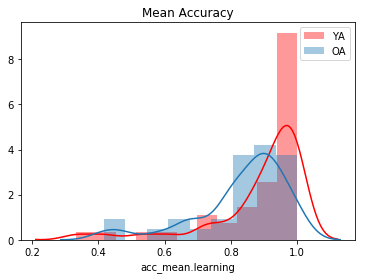

In [655]:
sns.distplot(df[df['Group'] == 'Young Adults']['acc_mean.learning'].dropna(), label = 'YA', color = 'red')
sns.distplot(df[df['Group'] == 'Older Adults']['acc_mean.learning'].dropna(), label = 'OA')
plt.legend()
plt.title('Mean Accuracy')

Text(0.5,1,'Mean Response Time')

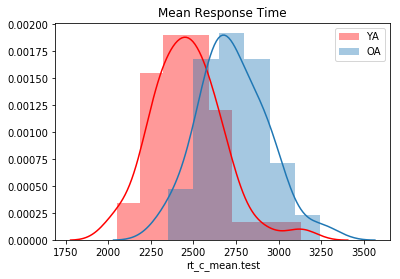

In [646]:
sns.distplot(df[df['Group'] == 'Young Adults']['rt_c_mean.test'].dropna(), label = 'YA', color = 'red')
sns.distplot(df[df['Group'] == 'Older Adults']['rt_c_mean.test'].dropna(), label = 'OA')
plt.legend()
plt.title('Mean Response Time')

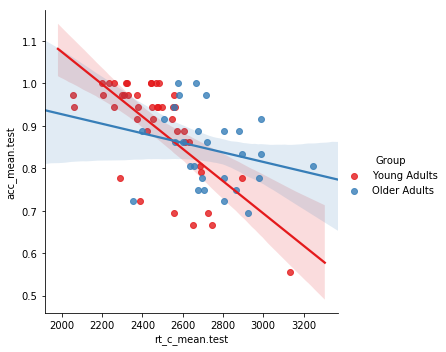

In [656]:
sns.lmplot(data=df, x="rt_c_mean.test", y="acc_mean.test", hue="Group", palette = 'Set1')

[RT Transformations resource](https://lindeloev.github.io/shiny-rt/)

Text(0.5,1,'Log Mean Response Time')

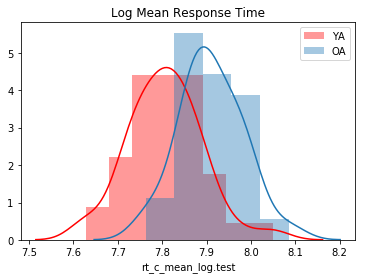

In [645]:
df['rt_c_mean_log.test'] = np.log(df['rt_c_mean.test'])
sns.distplot(df[df['Group'] == 'Young Adults']['rt_c_mean_log.test'].dropna(), label = 'YA', color = 'red')
sns.distplot(df[df['Group'] == 'Older Adults']['rt_c_mean_log.test'].dropna(), label = 'OA')
plt.legend()
plt.title('Log Mean Response Time')

Text(0.5,1,'DMN-FPN Modularity')

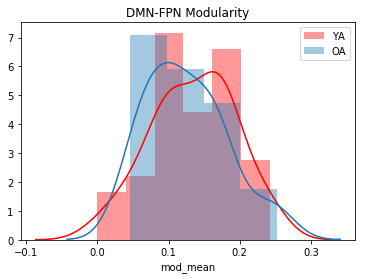

In [585]:
sns.distplot(df[df['Group'] == 'Young Adults']['mod_mean'].dropna(), label = 'YA', color = 'red')
sns.distplot(df[df['Group'] == 'Older Adults']['mod_mean'].dropna(), label = 'OA')
plt.legend()
plt.title('DMN-FPN Modularity')

Text(0.5,1,'DMN-FPN Participation Coefficient')

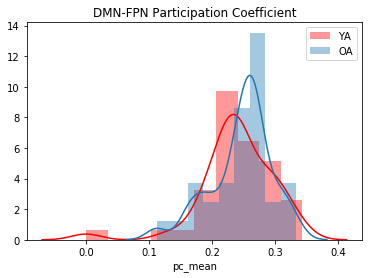

In [586]:
sns.distplot(df[df['Group'] == 'Young Adults']['pc_mean'].dropna(), label = 'YA', color = 'red')
sns.distplot(df[df['Group'] == 'Older Adults']['pc_mean'].dropna(), label = 'OA')
plt.legend()
plt.title('DMN-FPN Participation Coefficient')

In [652]:
from scipy import stats

stats.ttest_ind(df[df['Group'] == 'Young Adults']['pc_mean'], df[df['Group'] == 'Older Adults']['pc_mean'], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-0.49353778558050937, pvalue=0.623055889530145)

In [ ]:
sns.distplot(df[df['Group'] == 'Young Adults']['actamp'].dropna(), label = 'YA', color = 'red')
sns.distplot(df[df['Group'] == 'Older Adults']['actamp'].dropna(), label = 'OA')
plt.legend()
plt.title('Rhythm Amplitude')

Text(0.5,1,'Relative Amplitude')

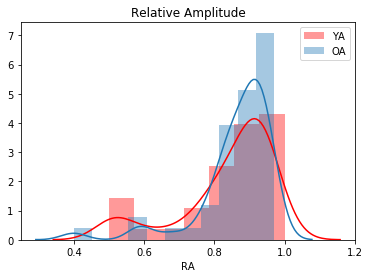

In [424]:
sns.distplot(df[df['Group'] == 'Young Adults']['RA'].dropna(), label = 'YA', color = 'red')
sns.distplot(df[df['Group'] == 'Older Adults']['RA'].dropna(), label = 'OA')
plt.legend()
plt.title('Relative Amplitude')

Text(0.5,1,'Acrophase')

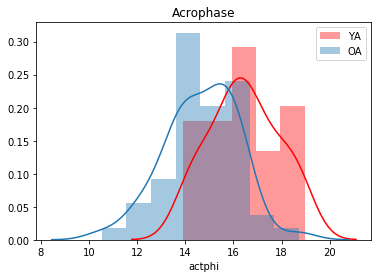

In [425]:
sns.distplot(df[df['Group'] == 'Young Adults']['actphi'].dropna(), label = 'YA', color = 'red')
sns.distplot(df[df['Group'] == 'Older Adults']['actphi'].dropna(), label = 'OA')
plt.legend()
plt.title('Acrophase')

### Rest-activity rhythms and memory performance

### Amplitude

Text(0.5,1,'Amplitude vs. Accuracy')

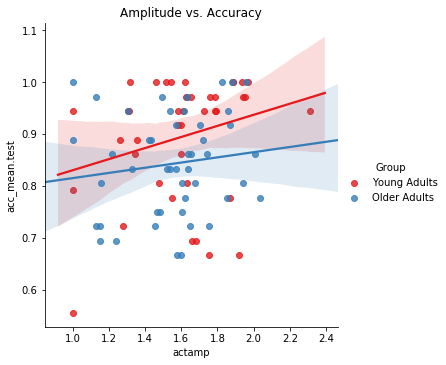

In [411]:
sns.lmplot(data=df, x="actamp", y="acc_mean.test", hue="Group", palette = 'Set1')
plt.title('Amplitude vs. Accuracy')

Text(0.5,1,'Amplitude vs. Response Time')

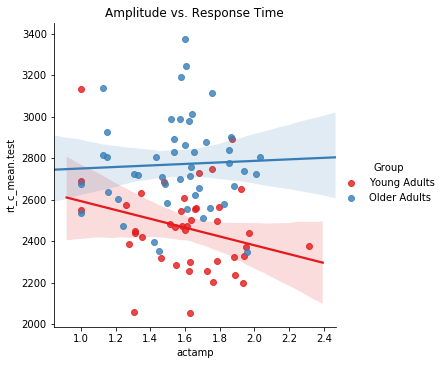

In [412]:
sns.lmplot(data=df, x="actamp", y="rt_c_mean.test", hue="Group", palette = 'Set1')
plt.title('Amplitude vs. Response Time')

### Relative amplitude

Text(0.5,1,'Relative Amplitude vs. Accuracy')

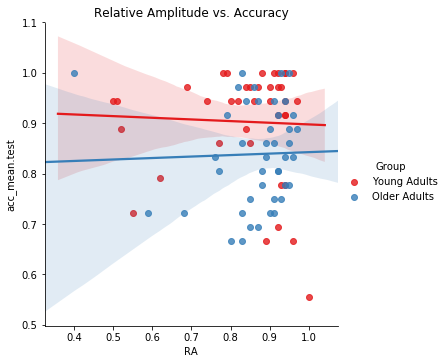

In [413]:
sns.lmplot(data=df, x="RA", y="acc_mean.test", hue="Group", palette = 'Set1')
plt.title('Relative Amplitude vs. Accuracy')

Text(0.5,1,'Relative Amplitude vs. Response Time')

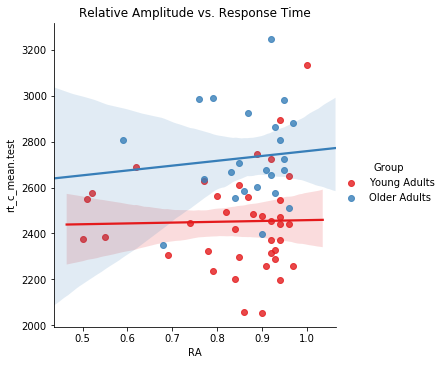

In [650]:
sns.lmplot(data=df, x="RA", y="rt_c_mean.test", hue="Group", palette = 'Set1')
plt.title('Relative Amplitude vs. Response Time')

### Acrophase

Text(0.5,1,'Acrophase vs. Accuracy')

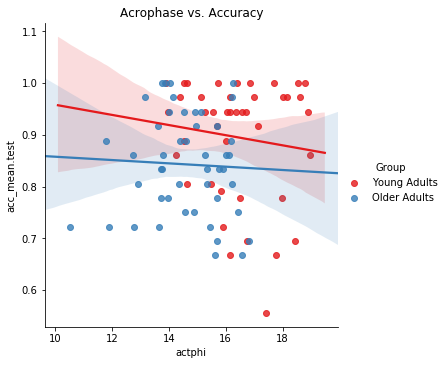

In [415]:
sns.lmplot(data=df, x="actphi", y="acc_mean.test", hue="Group", palette = 'Set1')
plt.title('Acrophase vs. Accuracy')

Text(0.5,1,'Acrophase vs. Response Time')

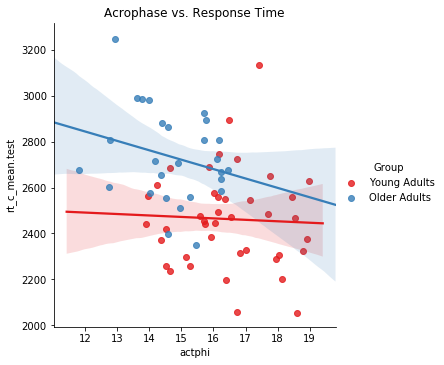

In [649]:
sns.lmplot(data=df, x="actphi", y="rt_c_mean.test", hue="Group", palette = 'Set1')
plt.title('Acrophase vs. Response Time')

### FC and memory performance

Text(0.5,1,'DMN-FPN Modularity vs. Response Time')

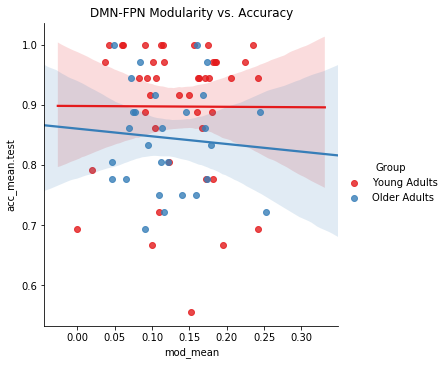

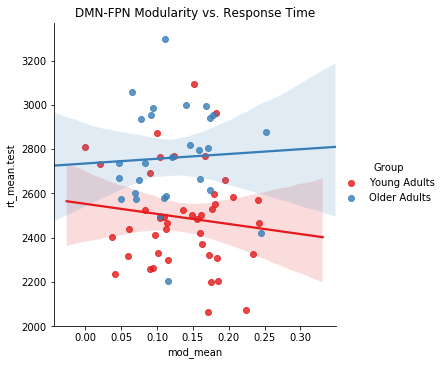

In [417]:
sns.lmplot(data=df, x="mod_mean", y="acc_mean.test", hue="Group", palette = 'Set1')
plt.title('DMN-FPN Modularity vs. Accuracy')
sns.lmplot(data=df, x="mod_mean", y="rt_mean.test", hue="Group", palette = 'Set1')
plt.title('DMN-FPN Modularity vs. Response Time')

Text(0.5,1,'DMN-FPN Participation Coefficient vs. Response Time')

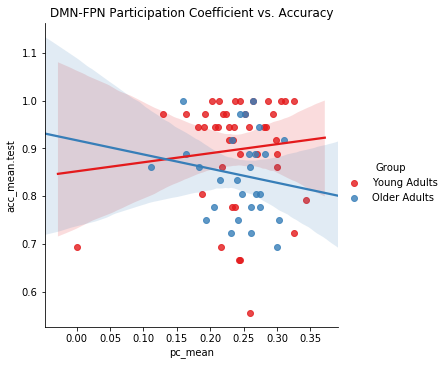

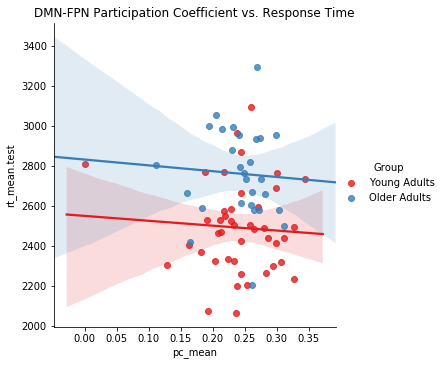

In [418]:
sns.lmplot(data=df, x="pc_mean", y="acc_mean.test", hue="Group", palette = 'Set1')
plt.title('DMN-FPN Participation Coefficient vs. Accuracy')
sns.lmplot(data=df, x="pc_mean", y="rt_mean.test", hue="Group", palette = 'Set1')
plt.title('DMN-FPN Participation Coefficient vs. Response Time')

### Rest-activity rhythms and FC

Text(0.5,1,'Amplitude vs. DMN-FPN Participation Coefficient')

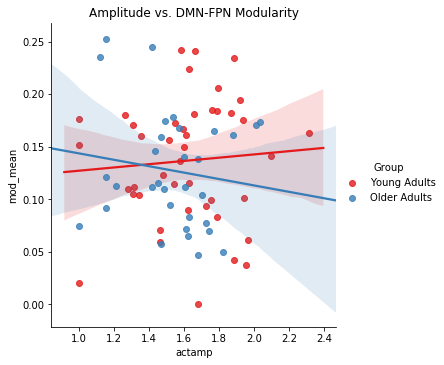

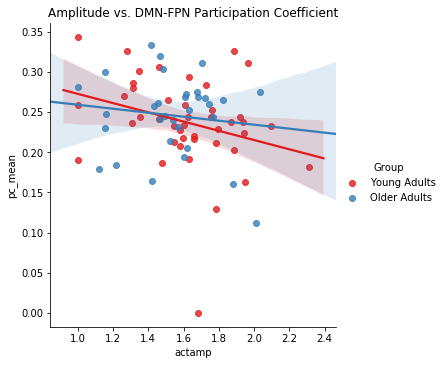

In [419]:
sns.lmplot(data=df, x="actamp", y="mod_mean", hue="Group", palette = 'Set1')
plt.title('Amplitude vs. DMN-FPN Modularity')
sns.lmplot(data=df, x="actamp", y="pc_mean", hue="Group", palette = 'Set1')
plt.title('Amplitude vs. DMN-FPN Participation Coefficient')

Text(0.5,1,'Relative Amplitude vs. DMN-FPN Participation Coefficient')

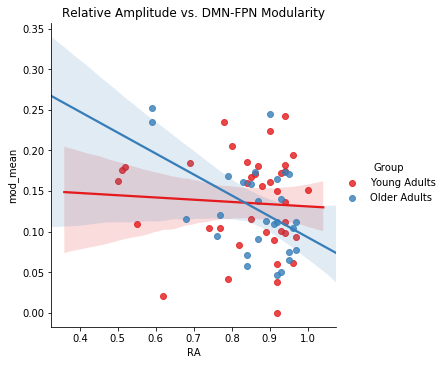

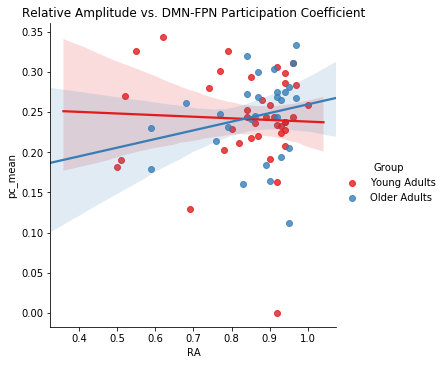

In [420]:
sns.lmplot(data=df, x="RA", y="mod_mean", hue="Group", palette = 'Set1')
plt.title('Relative Amplitude vs. DMN-FPN Modularity')
sns.lmplot(data=df, x="RA", y="pc_mean", hue="Group", palette = 'Set1')
plt.title('Relative Amplitude vs. DMN-FPN Participation Coefficient')

Text(0.5,1,'Acrophase vs. DMN-FPN Participation Coefficient')

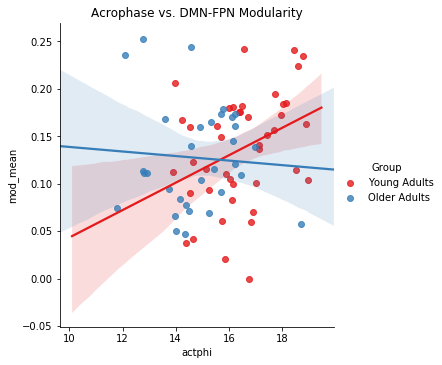

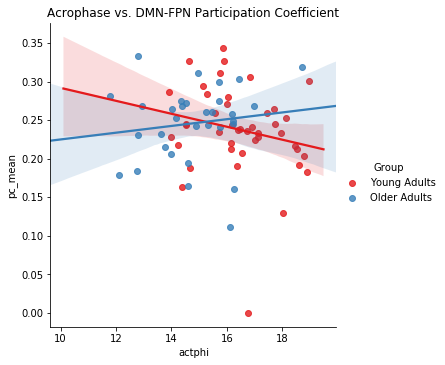

In [421]:
sns.lmplot(data=df, x="actphi", y="mod_mean", hue="Group", palette = 'Set1')
plt.title('Acrophase vs. DMN-FPN Modularity')
sns.lmplot(data=df, x="actphi", y="pc_mean", hue="Group", palette = 'Set1')
plt.title('Acrophase vs. DMN-FPN Participation Coefficient')

## ya > oa, t=2.5, k=10

max component size is 1
estimating null distribution with 10 permutations
permutation 0 of 10.  Permutation max is 0.0.  Observed max is 1.0.  P-val estimate is 0.000
permutation 1 of 10.  Permutation max is 0.0.  Observed max is 1.0.  P-val estimate is 0.000
permutation 2 of 10.  Permutation max is 0.0.  Observed max is 1.0.  P-val estimate is 0.000
permutation 3 of 10.  Permutation max is 0.0.  Observed max is 1.0.  P-val estimate is 0.000
permutation 4 of 10.  Permutation max is 0.0.  Observed max is 1.0.  P-val estimate is 0.000
permutation 5 of 10.  Permutation max is 9.0.  Observed max is 1.0.  P-val estimate is 0.167
permutation 6 of 10.  Permutation max is 0.0.  Observed max is 1.0.  P-val estimate is 0.143
permutation 7 of 10.  Permutation max is 1.0.  Observed max is 1.0.  P-val estimate is 0.250
permutation 8 of 10.  Permutation max is 1.0.  Observed max is 1.0.  P-val estimate is 0.333
permutation 9 of 10.  Permutation max is 1.0.  Observed max is 1.0.  P-val estimate is 0.

(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x1c62a5f90>)

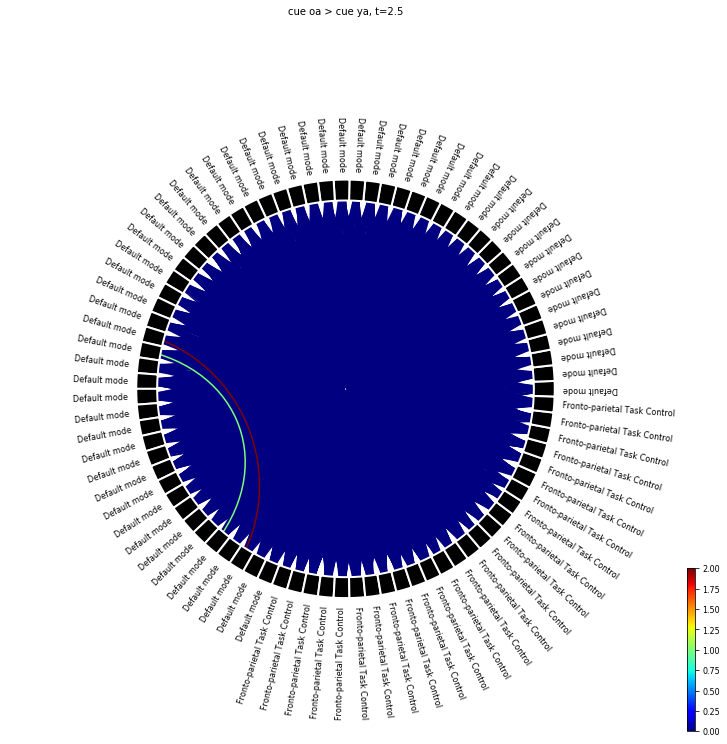

In [52]:
nbs_result_25 = nbs.nbs_bct(x['cue_ya'][dmn_fpn][:,dmn_fpn,:], x['cue_oa'][dmn_fpn][:,dmn_fpn,:], 3.5, k=10, tail='right', paired=False, verbose=True)
nbs_result_25

fig = plt.figure(figsize=(15, 15))

plot_connectivity_circle(nbs_result_25[1], atlas.loc[dmn_fpn].values.flatten(), n_lines=n_lines, fig=fig, title='cue ya > cue oa, t=2.5', 
                         fontsize_title=10, facecolor='white', textcolor='black', 
                         colormap='jet', colorbar=1, node_colors=['black'], 
                         node_edgecolor=['white'], show=False, interactive=False)

In [53]:
from bct import nbs

print('\nfpn')
nbs_result_fpn = nbs.nbs_bct(x['cue_ya'][fpn][:,fpn,:], x['cue_oa'][fpn][:,fpn,:], 2.5, k=10, tail='left', paired=False, verbose=True)
print('\ndmn')
nbs_result_dmn = nbs.nbs_bct(x['cue_ya'][dmn][:,dmn,:], x['cue_oa'][dmn][:,dmn,:], 2.5, k=10, tail='left', paired=False, verbose=True)




fpn
max component size is 4
estimating null distribution with 10 permutations
permutation 0 of 10.  Permutation max is 3.0.  Observed max is 4.0.  P-val estimate is 0.000
permutation 1 of 10.  Permutation max is 1.0.  Observed max is 4.0.  P-val estimate is 0.000
permutation 2 of 10.  Permutation max is 0.0.  Observed max is 4.0.  P-val estimate is 0.000
permutation 3 of 10.  Permutation max is 0.0.  Observed max is 4.0.  P-val estimate is 0.000
permutation 4 of 10.  Permutation max is 3.0.  Observed max is 4.0.  P-val estimate is 0.000
permutation 5 of 10.  Permutation max is 2.0.  Observed max is 4.0.  P-val estimate is 0.000
permutation 6 of 10.  Permutation max is 1.0.  Observed max is 4.0.  P-val estimate is 0.000
permutation 7 of 10.  Permutation max is 0.0.  Observed max is 4.0.  P-val estimate is 0.000
permutation 8 of 10.  Permutation max is 1.0.  Observed max is 4.0.  P-val estimate is 0.000
permutation 9 of 10.  Permutation max is 1.0.  Observed max is 4.0.  P-val estimate 

(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x1c70da650>)

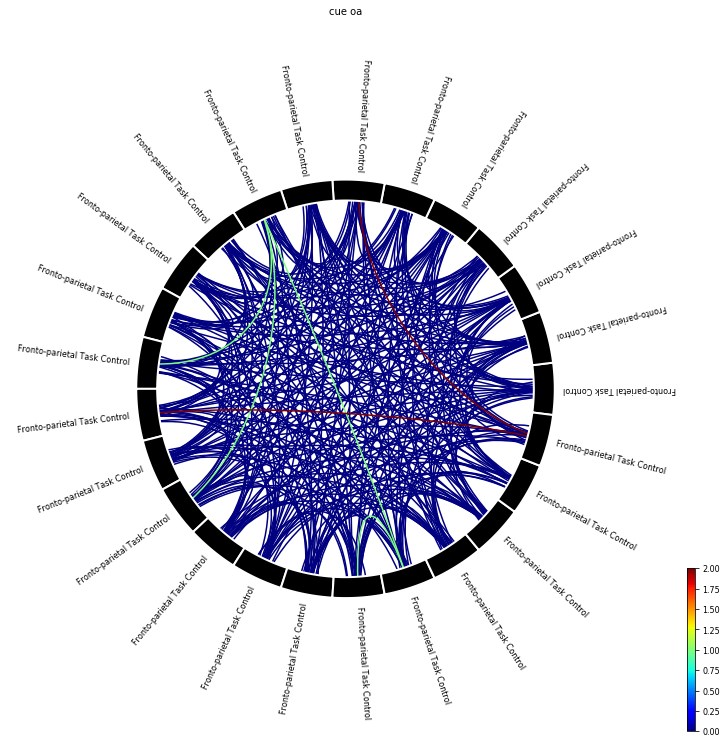

In [54]:
fig = plt.figure(figsize=(15, 15))

plot_connectivity_circle(nbs_result_fpn[1], atlas.loc[fpn].values.flatten(), n_lines=n_lines, fig=fig, title='cue oa', 
                         fontsize_title=10, facecolor='white', textcolor='black', 
                         colormap='jet', colorbar=1, node_colors=['black'], 
                         node_edgecolor=['white'], show=False, interactive=False)

(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x1c6f3e550>)

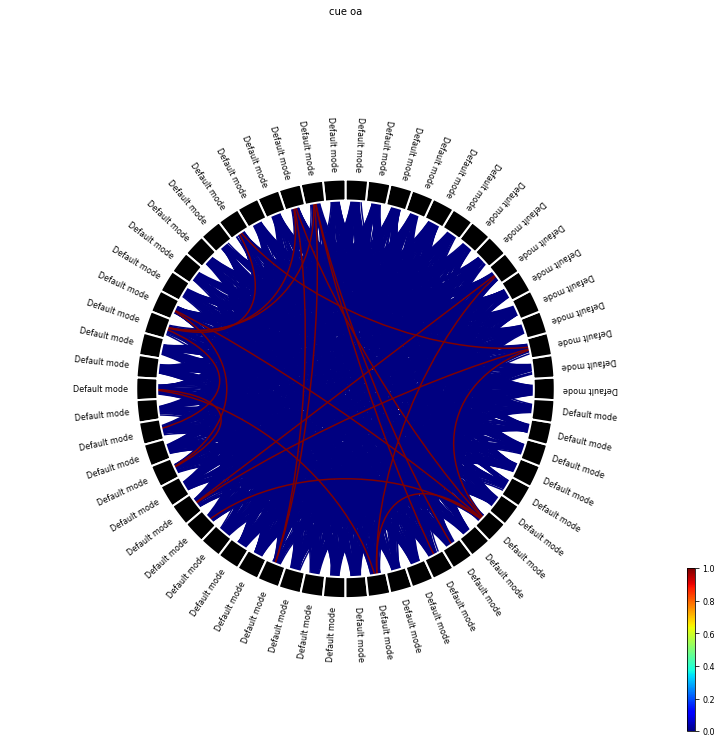

In [56]:
fig = plt.figure(figsize=(15, 15))

plot_connectivity_circle(nbs_result_dmn[1], atlas.loc[dmn].values.flatten(), n_lines=n_lines, fig=fig, title='cue oa', 
                         fontsize_title=10, facecolor='white', textcolor='black', 
                         colormap='jet', colorbar=1, node_colors=['black'], 
                         node_edgecolor=['white'], show=False, interactive=False)

### Nibetaseries tutorial below

In [144]:
pd_dict = {}
for subject in subjects:
    pd_dict[subject] = {}
    out_dir=nibs_dir + '/sub-' + subject + '/func/'
    os.chdir(out_dir)
    
for trial_type in trial_types:
    try: 
        file_path = glob.glob(out_dir + 'sub-' + subject + '_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-' + trial_type + '_correlation.tsv')[0]
        print(file_path)
        pd_dict[subject][trial_type] = pd.read_csv(file_path, sep='\t', na_values="n/a", index_col=0)
    
    except Exception as e:
        print(e)

        # display example matrix
# print(pd_dict[trial_type].head())

/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-30023/func/sub-30023_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-cue_correlation.tsv
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-30023/func/sub-30023_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-match_correlation.tsv
/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries/sub-30023/func/sub-30023_task-MemMatch_run-concat_space-MNI152NLin2009cAsym_desc-mismatch_correlation.tsv


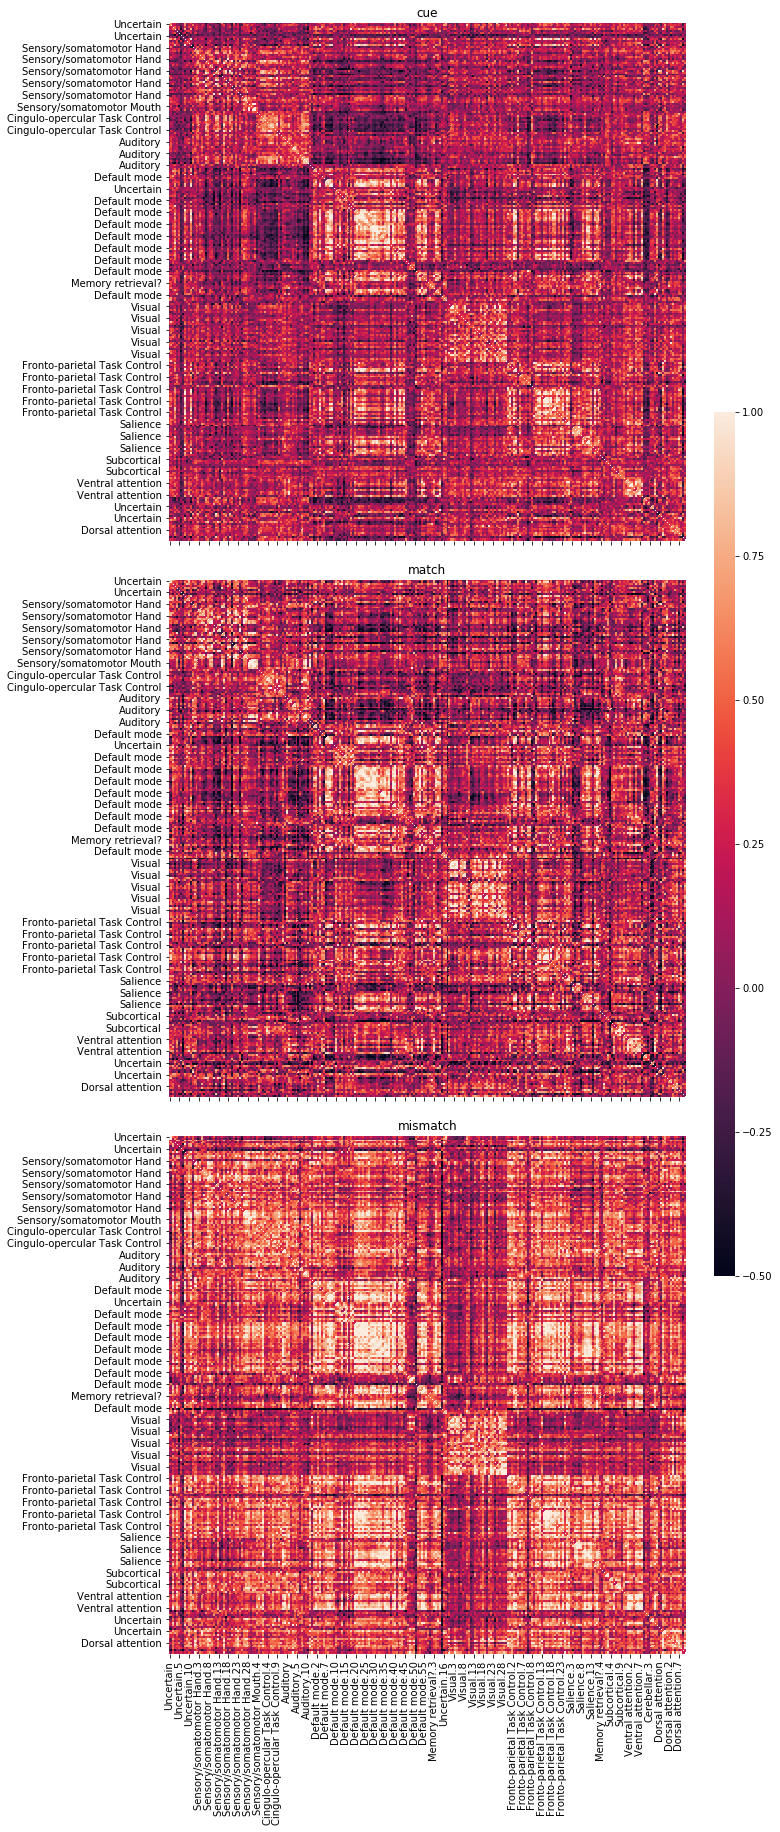

In [148]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(10, 30),
                         gridspec_kw={'wspace': 0.025, 'hspace': 0.075})

cbar_ax = fig.add_axes([.91, .3, .03, .4])
r = 0

for subject, df in pd_dict.items():
    for trial_type, df in df.items():
#         print(df)
        g = sns.heatmap(df, ax=axes[r], vmin=-.5, vmax=1., square=True,
                        cbar=True, cbar_ax=cbar_ax)
        axes[r].set_title(trial_type)
#     # iterate over rows
        r += 1
plt.tight_layout()

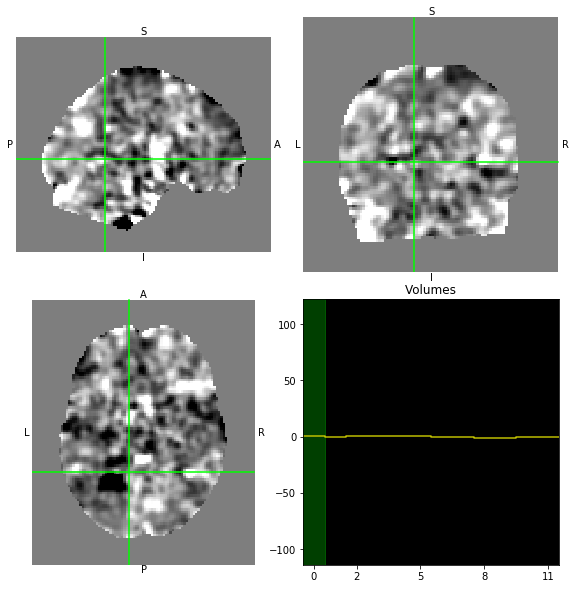

In [3]:
subject = '30004'
out_dir = nibs_dir + '/sub-%s/func/' % subject

nii_dict = {}
for trial_type in trial_types:
    file_path = os.path.join(out_dir, 'sub-' + subject + '_task-MemMatch1_run-1_space-MNI152NLin2009cAsym_desc-' + trial_type + '_betaseries.nii.gz')
    nii_dict[trial_type] = nib.load(file_path)

# view cue beta_maps
nib.viewers.OrthoSlicer3D(nii_dict['cue'].get_fdata(),
                          title="Cue Betas").set_position(42,40,42)

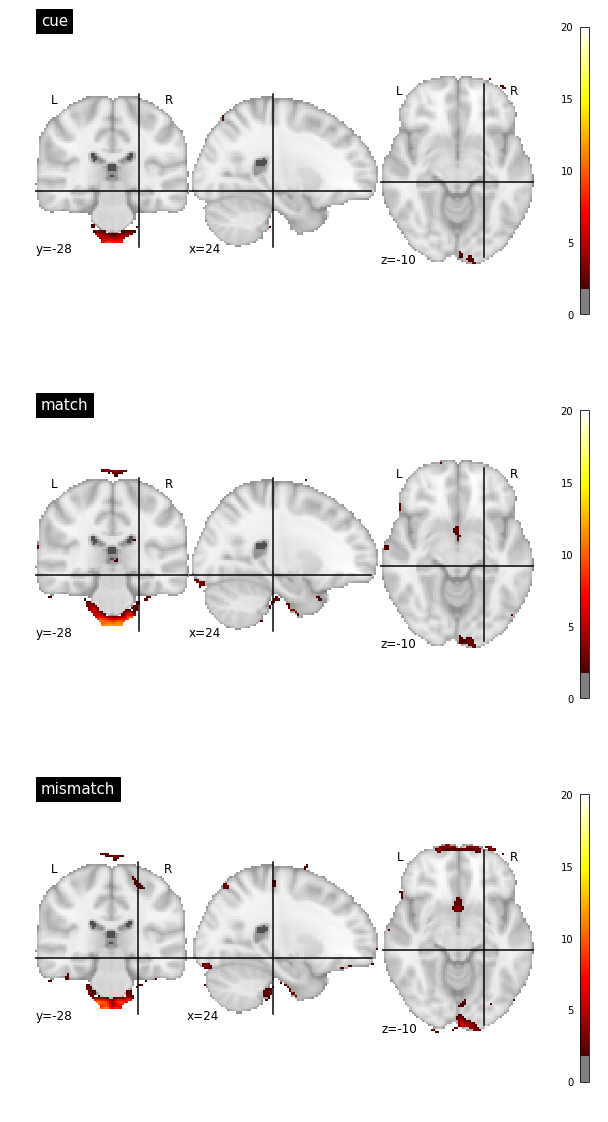

In [5]:
# standard deviations for each trial type
std_dict = {tt: nib.Nifti1Image(img.get_fdata().std(axis=-1), img.affine, img.header)
            for tt, img in nii_dict.items()}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for idx, (trial_type, nii) in enumerate(std_dict.items()):
    plotting.plot_stat_map(nii, title=trial_type, cut_coords=(24, -28, -10),
                           threshold=2, vmax=20, axes=axes[idx])